In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pydub import AudioSegment
import os
import math
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import csv
import japanize_matplotlib
from data import *
import librosa

In [9]:
music_count_length = 96  # UWW: 96  toshi: 90
music_half_count_length = music_count_length * 2
music_quarter_count_length = music_count_length * 4
accel_start_timing = 606  # UWW: 606  toshi: 641
kinect_start_timing = 250   # UWW: 250   toshi: 556
offset=10 # UWW: 10  toshi: 140
duration=65  # UWW: 65  toshi: 60
tempo = 89.10290948
print(tempo)
half_count = float(30/tempo)
quarter_count = float(15/tempo)
half_count_list = []
quarter_count_list = []
for i in range(music_half_count_length):
    half_count_list.append(i * half_count)
    
for l in range(music_quarter_count_length):
    quarter_count_list.append(l * quarter_count)

89.10290948


In [10]:
def part_to_figure(vocal, melody, drum):
    data_length = len(vocal)
    figure_time_list = []
    for i in range(data_length):
        figure_time_list.append(i * 16 * 12 *quarter_count / 100)
    x1 = figure_time_list
    y1 = vocal
    y2 = melody
    y3 = drum


    # Figureの初期化
    fig = plt.figure(figsize=(12, 10)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
    label_l = ['', 'systemOnly', 'handmadeOnly', '(0,0)', '(1,1)']

    ax = fig.add_subplot(3, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 3.5))
    ax.set_title("vocal",fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)

    ax = fig.add_subplot(3, 1, 2)#(行，列，領域番号)
    ax.plot(x1, y2,c="green",label='Estimated Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 3.5))
    ax.set_title("melody",fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)

    ax = fig.add_subplot(3, 1, 3)#(行，列，領域番号)
    ax.plot(x1, y3,c="red",label='Estimated Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 3.5))
    ax.set_title("drum",fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)
    

    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.show()
#     files.download(figname)

In [11]:
def single_to_figure(lists):
    data_length = len(lists)
    figure_time_list = []
    for i in range(data_length):
        figure_time_list.append(i * 16 * 12 *quarter_count / 100)
    x1 = figure_time_list
    y1 = lists


    # Figureの初期化
    fig = plt.figure(figsize=(12, 5)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
    label_l = ['systemOnly', 'handmadeOnly', '(0,0)', '(1,1)']

    ax = fig.add_subplot(1, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.set_xlabel('Time[s]',fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    ax.set_ylim((0, 3.5))
    ax.set_title("body",fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    ax.set_yticklabels(label_l, ha='right',fontsize=22)
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)



    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.show()
#     files.download(figname)
    


def XY_to_figure(title, x_name, x_lists, y_name, y_lists):
    data_length = len(x_lists)
    
    x1 = x_lists
    y1 = y_lists


    # Figureの初期化
    fig = plt.figure(figsize=(12, 5)) #...1

    #図の形式定義
    plt.rcParams['font.family'] ='Yu Gothic'#使用するフォント
    plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
    plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
    plt.rcParams['font.size'] = 19 #フォントの大きさ
    plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
    
    # label_l = ['systemOnly', 'handmadeOnly', '(0,0)', '(1,1)']

    ax = fig.add_subplot(1, 1, 1)#(行，列，領域番号)
    ax.plot(x1, y1,c="blue",label='Estimated Part',linewidth=0.8)
    ax.set_xlabel(x_name,fontsize=22)
    ax.set_ylabel(y_name,fontsize=22)
#     ax.set_ylabel('acc')
#     ax.set_xlim((0,14000))
    # ax.set_ylim((0, 3.5))
    ax.set_title(title,fontsize=26)
    # ax.set_title("tf-idf method",fontsize=26)
    # ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(1, -1))
    # ax.set_yticklabels(label_l, ha='right',fontsize=22)
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=19)



    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
    plt.show()
#     files.download(figname)

In [38]:
def CreateSimilarlyList(moveList, partList):
    result = []
    for move, part in zip(moveList, partList):
        if move == part == 1:
            result.append(1)
        else: result.append(0)
    return result

def CompareSimilarlyListWithHandmade(similaryList, handmadeList):
    result = []
    ok_sum = 0
    miss_num = 0
    for similarly, handmade in zip(similaryList, handmadeList):
        if similarly == handmade:
            ok_sum += 1
            if similarly == 1:
                result.append(3)
            else: result.append(2)
        else:
            miss_num += 1
            if handmade == 1:
                result.append(1)
            else: result.append(0)
    return result, (ok_sum/(ok_sum + miss_num))*100
    
def max_point(handmadeList, plusPoint):
    result = 0
    for num in handmadeList:
        if num == 1:
            result += plusPoint
        elif num == 0:
            result += 1
    return result
    

def CalAccuracyPriorOverlapTiming(similaryList, handmadeList, plusPoint):
    ok_sum = 0
    for similarly, handmade in zip(similaryList, handmadeList):
        if similarly == handmade:
            if similarly == 1:
                ok_sum += plusPoint
            else: ok_sum += 1
    return (ok_sum/max_point(handmadeList, plusPoint))*100


def partToBody(partsList, threshold):
    result = []
    for i in range(len(partsList[0])):
        sum_part_timing = 0
        for j in range(len(partsList)):
            sum_part_timing += partsList[j][i]
        if sum_part_timing >= threshold:
            result.append(1)
        else: result.append(0)
    return result


def accel_composite(file_path, start_timing):
    df = pd.read_csv(file_path, header = None, usecols=[3, 4, 5])
    df.columns = ["x", "y", "z"]
#     print(df)
    composite = []
    for i in range(len(df)):
        x_value = float(df["x"][i] ** 2)
        y_value = float(df["y"][i] ** 2)
        z_value = float(df["z"][i] ** 2)
        composite_value = math.sqrt(x_value + y_value + z_value)
        composite.append(composite_value)
    return composite[start_timing:]  # 開始タイミング

# def accel_file_cut(file_path: pd.DataFrame) -> pd.DataFrame:
#     composite = accel_composite(file_path)
# #     df = pd.read_csv(file_name,header = None)
# #     df.columns = ["time", "degree"]
# #     df["time"] *= 0.2
#     for i in range(len(composite)):
#         if i >= 500 and composite[i] >= 2000:
#             start_timing = i
#             return print(start_timing)
#             break
    
#     composite = composite[start_timing:]
#     return composite

def accel_timing_move(file_path, start_timing, threshold_level, small_or_large):
    composite = accel_composite(file_path, start_timing)
#     accel_data["time"] *= 0.02
    accel_data = np.array(composite)
    accel_data = np.ndarray.flatten(accel_data)
    if small_or_large == "small":
        data_kind = 90 - accel_data
    elif small_or_large == "large":
        data_kind = accel_data
    peaks, _ = find_peaks(data_kind, height=threshold_level)
    # print('num_peaks:', len(peaks))
    # plt.plot(accel_data)
    # plt.plot(peaks, accel_data[peaks], "x")
    # plt.plot(np.zeros_like(accel_data), "--", color="gray")
    # plt.show()
    count = 0
    half_timing = []
    quarter_timing = []
    for _ in range(music_half_count_length):
        half_timing.append(0)
    for _ in range(music_quarter_count_length):
        quarter_timing.append(0)

#     timing 
    peak_time = []
    for i in peaks:
        time = float(i/50)
        peak_time.append(time)   
    for i in peak_time:
        for j in range(1, len(half_count_list)-1):
            if half_count_list[j] <= i < half_count_list[j+1]:
#                 if timing[j] == 1:
#                     continue
#                 else:
                half_timing[j] = 1
#             else:
#                 timing.insert(j, 0)
#     print(timing)
    return half_timing




names_list=["PELVIS","SPINE_NAVAL","SPINE_CHEST","NECK","CLAVICLE_LEFT","SHOULDER_LEFT","ELBOW_LEFT","WRIST_LEFT",
"HAND_LEFT","HANDTIP_LEFT","THUMB_LEFT","CLAVICLE_RIGHT","SHOULDER_RIGHT","ELBOW_RIGHT","WRIST_RIGHT","HAND_RIGHT",
"HANDTIP_RIGHT","THUMB_RIGHT","HIP_LEFT","KNEE_LEFT","ANKLE_LEFT","FOOT_LEFT","HIP_RIGHT","KNEE_RIGHT",
"ANKLE_RIGHT","FOOT_RIGHT","HEAD","NOSE","EYE_LEFT","EAR_LEFT","EYE_RIGHT","EAR_RIGHT"]

kinect_names = ["Time"]
for name in names_list:
    kinect_names.append(name + "_X")
    kinect_names.append(name + "_Y")
    kinect_names.append(name + "_Z")
kinect_names.append("")


def numpy_data(df: pd.DataFrame, body_part: str):
    numX=df[body_part + '_X'].to_numpy()
    numY=df[body_part + '_Y'].to_numpy()
    numZ=df[body_part + '_Z'].to_numpy()

    numX = np.ndarray.flatten(numX)
    numY = np.ndarray.flatten(numY)
    numZ = np.ndarray.flatten(numZ)

    num = np.stack([numX, numY, numZ], 1)
#     print(num)
#     num = np.ndarray.flatten(num)
#     print(num)
    return num


def find_cos(start, point, end):
    cos_list = []
    for i in range(len(start)):
        vec_a = start[i] - point[i]
        vec_c = end[i] - point[i]

        # コサインの計算
        length_vec_a = np.linalg.norm(vec_a)
        length_vec_c = np.linalg.norm(vec_c)
        inner_product = np.inner(vec_a, vec_c)
        cos = inner_product / (length_vec_a * length_vec_c)

        # 角度（ラジアン）の計算
        rad = np.arccos(cos)

        # 弧度法から度数法（rad ➔ 度）への変換
        degree = np.rad2deg(rad)
        
        cos_list.append(degree)
#     print(cos_list)
    return cos_list


def degree(file_name):
  # 点A,B,Cの座標（3次元座標上の場合）
  #a = np.array([0,1,2]) #この3行の座標はテスト用
  #b = np.array([10,20,30])
  #c = np.array([5,7,9])
    df = pd.read_csv(file_name, header=None, names = kinect_names)
    WRIST_RIGHT_data = numpy_data(df, "WRIST_RIGHT")
    SHOULDER_RIGHT_data = numpy_data(df, "SHOULDER_RIGHT")
    ELBOW_RIGHT_data = numpy_data(df, "ELBOW_RIGHT")
    ANKLE_RIGHT_data = numpy_data(df, "ANKLE_RIGHT")
    HIP_RIGHT_data = numpy_data(df, "HIP_RIGHT")
    KNEE_RIGHT_data = numpy_data(df, "KNEE_RIGHT")
    WRIST_LEFT_data = numpy_data(df, "WRIST_LEFT")
    SHOULDER_LEFT_data = numpy_data(df, "SHOULDER_LEFT")
    ELBOW_LEFT_data = numpy_data(df, "ELBOW_LEFT")
    ANKLE_LEFT_data = numpy_data(df, "ANKLE_LEFT")
    HIP_LEFT_data = numpy_data(df, "HIP_LEFT")
    KNEE_LEFT_data = numpy_data(df, "KNEE_LEFT")
    
#     print(WRIST_RIGHT_data,SHOULDER_RIGHT_data)
#     print(WRIST_RIGHT_data - SHOULDER_RIGHT_data)
 
    ELBOW_RIGHT_degree = find_cos(WRIST_RIGHT_data, ELBOW_RIGHT_data, SHOULDER_RIGHT_data)
    KNEE_RIGHT_degree = find_cos(ANKLE_RIGHT_data, KNEE_RIGHT_data, HIP_RIGHT_data)
    ELBOW_LEFT_degree = find_cos(WRIST_LEFT_data, ELBOW_LEFT_data, SHOULDER_LEFT_data)
    KNEE_LEFT_degree = find_cos(ANKLE_LEFT_data, KNEE_LEFT_data, HIP_LEFT_data)
  
    return ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree


# def file_cut(df: pd.DataFrame) -> pd.DataFrame:
# #     df = pd.read_csv(file_name,header = None)
# #     df.columns = ["Degree"]
# #     df["time"] *= 0.2
#     count = 0
#     for i in range(len(df)):
#         if i > 400 and df[i] >= 30:
#             start_timing = i
#             break
# #     print(i)
#     df = df[start_timing+1:]
#     return df

# def decide_threshold_level()

def kinect_timing_move(kinect_data, start_timing, small_threshold, large_threshold):
#     kinect_data = file_cut(df)
#     kinect_data["time"] *= 0.02
    kinect_data = kinect_data[start_timing:]   # 開始タイミング
#     print(kinect_data)
    small_data_kind = [180 - data for data in kinect_data]
    
    large_data_kind = kinect_data
    large_peaks, _ = find_peaks(large_data_kind, height=large_threshold)
    small_peaks, _ = find_peaks(small_data_kind, height=(180-small_threshold))
    # print(type(small_peaks))
    # print('num_peaks:', len(large_peaks), large_peaks[:20])
    # plt.plot(kinect_data)
    # # plt.plot(peaks, kinect_data[peaks], "x")
    # plt.plot(np.zeros_like(kinect_data), "--", color="gray")
    # plt.show()
    
    count = 0
    half_timing = [0 for _ in range(music_half_count_length)]
    quarter_timing = [0 for _ in range(music_quarter_count_length)]
    
#     timing 
    peak_time = []
    for i in large_peaks:
        time = float(i/30)
        peak_time.append(time)
    for i in small_peaks:
        time = float(i/30)
        peak_time.append(time)
    for i in peak_time:
        for j in range(1, len(half_count_list)-1):
            if half_count_list[j] <= i < half_count_list[j+1]:
                half_timing[j] = 1

    return half_timing

    
def enlarge_sentence(sentence: list, length: int) -> list:
    sentence_list = []
    return [num for num in sentence for _ in range(length)]


In [13]:
HRBase_HM_df = pd.read_csv('data/HRBASE_4.csv', usecols=[i for i in range(2,17)], header=1, encoding="utf-8")
# print(HRBase_HM_df)
similarly_vocal = HRBase_HM_df['ボーカル']
similarly_melody = HRBase_HM_df['メロディ']
similarly_drum = HRBase_HM_df['ドラム']
body = HRBase_HM_df['全身']
vocal = HRBase_HM_df['ボーカル.1']
melody = HRBase_HM_df['メロディ.1']
drum = HRBase_HM_df['ドラム.1']
rightHand = HRBase_HM_df['右手']
rightFoot = HRBase_HM_df['右足']
rightElbow = HRBase_HM_df['右肘']
rightKnee = HRBase_HM_df['右膝']
leftHand = HRBase_HM_df['左手']
leftFoot = HRBase_HM_df['左足']
leftElbow = HRBase_HM_df['左肘']
leftKnee = HRBase_HM_df['左膝']

partsNameList = ['右手', '右足', '左手', '左足', '右肘', '右膝', '左肘', '左膝']

partsList = [rightHand, rightFoot, leftHand, leftFoot, rightElbow, rightKnee, leftElbow, leftKnee]
musicList = [vocal, melody, drum]
musicNameList = ['vocal', 'melody', 'drum']

vocal_result = CreateSimilarlyList(body, vocal)
melody_result = CreateSimilarlyList(body, melody)
drum_result = CreateSimilarlyList(body, drum)

vocal_accuracy_graph, vocal_accuracy_num = CompareSimilarlyListWithHandmade(vocal_result, similarly_vocal)
melody_accuracy_graph, melody_accuracy_num = CompareSimilarlyListWithHandmade(melody_result, similarly_melody)
drum_accuracy_graph, drum_accuracy_num = CompareSimilarlyListWithHandmade(drum_result, similarly_drum)

print('vocal accyracy: ', vocal_accuracy_num)
print('melody accyracy: ', melody_accuracy_num)
print('drum accyracy: ', drum_accuracy_num)

# part_to_figure(vocal_accuracy_graph, melody_accuracy_graph, drum_accuracy_graph)

print(len(rightHand))

for i in range(1, 9):
    similarlyBody = partToBody(partsList, i)
    body_accuracy_graph, body_accuracy_num = CompareSimilarlyListWithHandmade(similarlyBody, body)
    # print(body_accuracy_graph)

    print('精度: ', body_accuracy_num, 'threshold: ', i)
    # single_to_figure(body_accuracy_graph)



vocal accyracy:  87.5
melody accyracy:  86.45833333333334
drum accyracy:  95.83333333333334
192
精度:  95.83333333333334 threshold:  1
精度:  94.27083333333334 threshold:  2
精度:  79.16666666666666 threshold:  3
精度:  60.416666666666664 threshold:  4
精度:  46.35416666666667 threshold:  5
精度:  40.10416666666667 threshold:  6
精度:  38.02083333333333 threshold:  7
精度:  38.02083333333333 threshold:  8


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

plusPoint:  1
[85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.9375, 85.546875, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.15625, 85.02604166666666, 85.02604166666666, 84.89583333333334, 84.89583333333334, 84.63541666666667, 84.63541666666667, 84.63541666666667, 84.63541666666667, 84.375, 84.375, 84.375, 84.24479166666666, 84.24479166666666, 84.11458333333333, 83.984375, 83.984375, 83.85416666666666, 83.72395833333333, 83.59375, 83.59375, 83.46354166666666, 83.07291666666666, 83.07291666666666, 82.94270833333334, 82.8125, 82.8125, 82.94270833333333, 82.421875, 82.16145833333334, 82.29166666666667, 82.16145833333334, 81.25, 80.859375, 80.859375, 80.72916666666666, 80.46875, 80.33854166666666, 80.46875, 79.81770833333334, 79.55729166666666, 79.03645833333334, 78.515625, 77.7

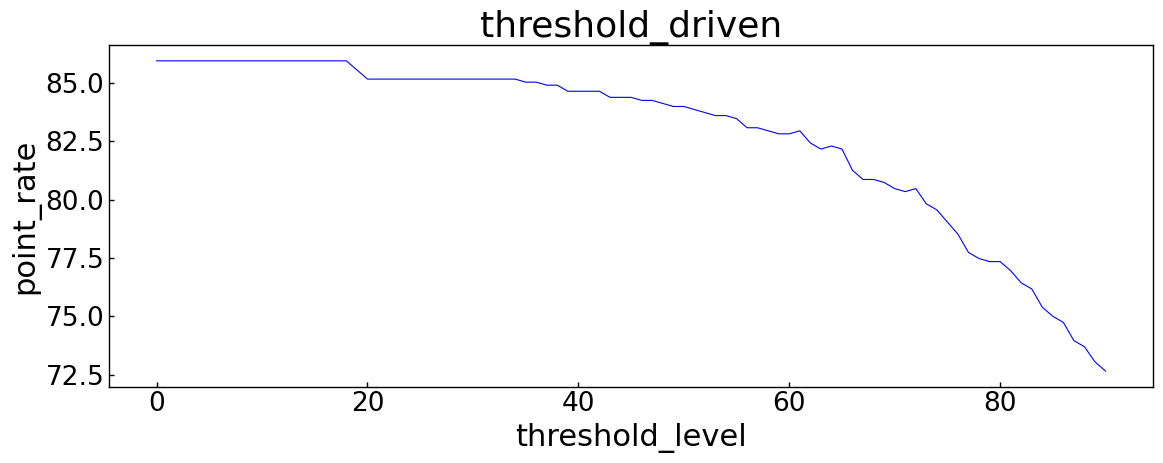

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[23.69791666666667, 23.69791666666667, 23.958333333333336, 24.08854166666667, 24.21875, 24.348958333333336, 24.479166666666664, 25.0, 25.130208333333336, 25.130208333333336, 25.390625, 25.26041666666667, 25.390625, 25.390625, 25.520833333333336, 25.651041666666664, 25.651041666666664, 26.432291666666664, 26.69270833333333, 26.953125, 27.08333333333333, 27.213541666666664, 27.213541666666664, 27.213541666666664, 27.47395833333333, 27.864583333333336, 28.255208333333336, 28.645833333333332, 28.645833333333332, 29.036458333333332, 29.036458333333336, 29.166666666666668, 29.427083333333336, 29.557291666666668, 29.947916666666664, 30.46875, 30.859375, 30.859375, 30.729166666666664, 30.989583333333332, 31.119791666666668, 31.510416666666668, 31.770833333333332, 32.03125, 32.8125, 33.33333333333333, 33.85416666666667, 34.375, 34.89583333333333, 35.807291666666664, 36.197916666666664, 36.458333333333336, 37.76041666666667, 38.28125, 39.192708333333336, 39.713541666666664, 39.453125, 40.234375,

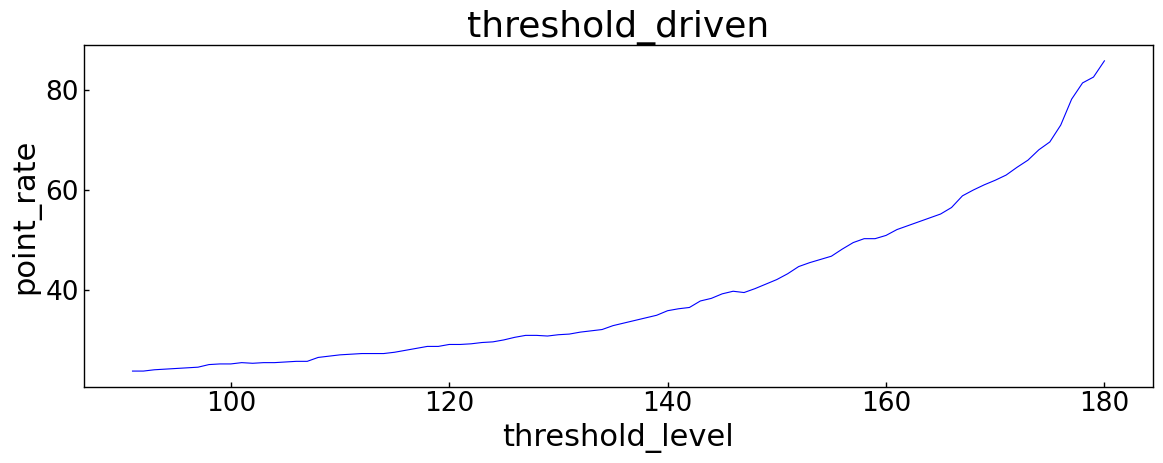

plusPoint:  2
[75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.96706112114497, 75.59941406232143, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.2497135126455, 75.14511100218525, 75.14511100218525, 75.02662758986297, 75.02662758986297, 74.80354166708045, 74.80354166708045, 74.80354166708045, 74.80354166708045, 74.59433664615995, 74.59433664615995, 74.59433664615995, 74.4717876265521, 74.4717876265521, 74.35917501393949, 74.25457250347924, 74.25457250347924, 74.13608909115698, 74.01354007154

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

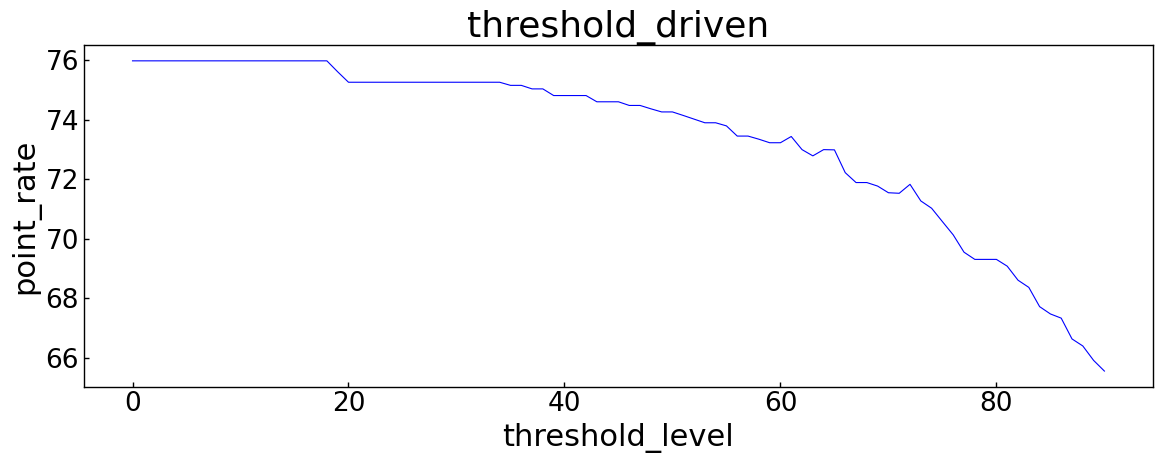

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[31.423165800757538, 31.423165800757538, 31.65031733082563, 31.772866350433468, 31.891349762755745, 31.995952273215998, 32.100554783676245, 32.57280435296003, 32.67740686342028, 32.67740686342028, 32.922504902635964, 32.68553807799142, 32.79014058845167, 32.79014058845167, 32.912689608059516, 33.025302220672124, 33.025302220672124, 33.72063771273843, 33.94778924280652, 34.19288728202221, 34.31543630163006, 34.437985321237896, 34.29748979248246, 34.29748979248246, 34.538522224412574, 34.87027626494093, 35.23792332376445, 35.57768746644516, 35.57768746644516, 35.78689248736566, 35.69617087876743, 35.67822436961984, 35.790836982232456, 35.913386001840294, 36.253150144521, 36.73521500838124, 37.07497915106195, 37.07497915106195, 36.86577413014145, 37.09292566020954, 36.99633325190165, 37.10466725962887, 37.219206177084345, 37.3399500042681, 38.029293584205966, 38.47953103705659, 38.637851962540836, 38.9996282216547, 39.46781218365292, 40.15908206843366, 40.48677050167643, 40.49478060382879

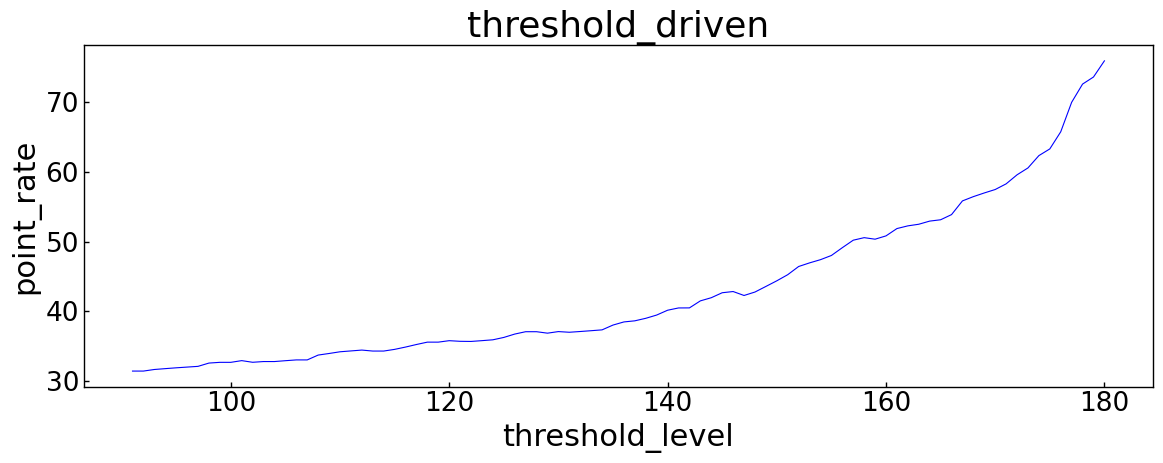

plusPoint:  3
[68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.38393490567404, 68.03671268345181, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.71781861455774, 67.63040602714516, 67.63040602714516, 67.52171037497125, 67.52171037497125, 67.32560213538474, 67.32560213538474, 67.32560213538474, 67.32560213538474, 67.15077696055957, 67.15077696055957, 67.15077696055957, 67.03503621981883, 67.03503621981883, 66.93582987061248, 66.8484172831999, 66.8484172831999, 66.73972163102599,

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

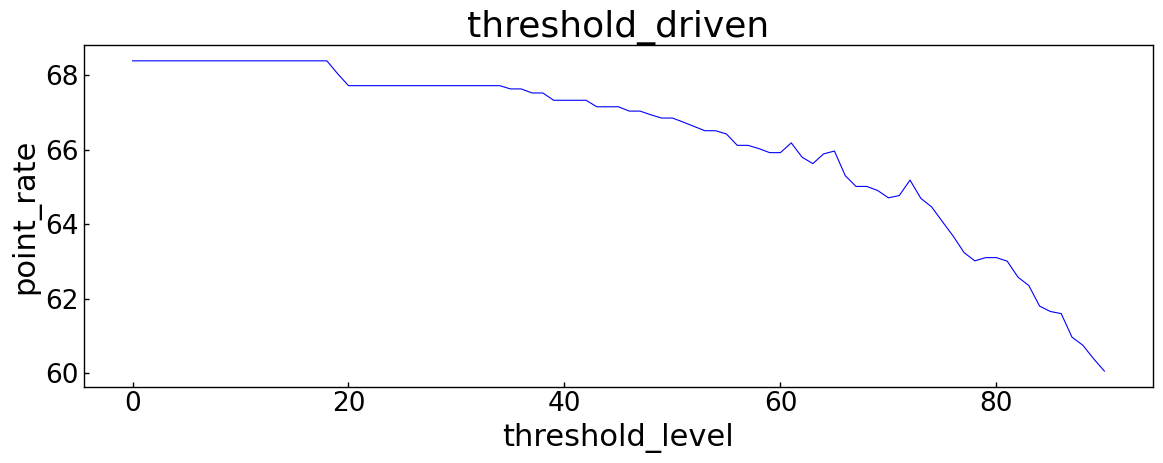

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[37.34257590235851, 37.34257590235851, 37.54572923051184, 37.66146997125258, 37.77016562342649, 37.85757821083908, 37.944990798251666, 38.37962560788648, 38.46703819529907, 38.46703819529907, 38.69851967678055, 38.3724327202588, 38.4598453076714, 38.4598453076714, 38.575586048412134, 38.67479239761849, 38.67479239761849, 39.30553544683979, 39.50868877499312, 39.740170256474606, 39.85591099721534, 39.97165173795609, 39.71184210314645, 39.71184210314645, 39.93627849606111, 40.22684441162702, 40.57406663384925, 40.876426311208924, 40.876426311208924, 40.93551074529336, 40.781968635229504, 40.637899741160616, 40.637899741160616, 40.75364048190136, 41.05600015926103, 41.504872945090334, 41.807232622450016, 41.807232622450016, 41.54499486021225, 41.748148188365576, 41.469376034593424, 41.36556076773468, 41.37030139747531, 41.3749022716414, 41.993859602555254, 42.39312117029508, 42.28919027832072, 42.51822754540146, 42.94581726646944, 43.482102639711336, 43.76562346671042, 43.581308988917684,

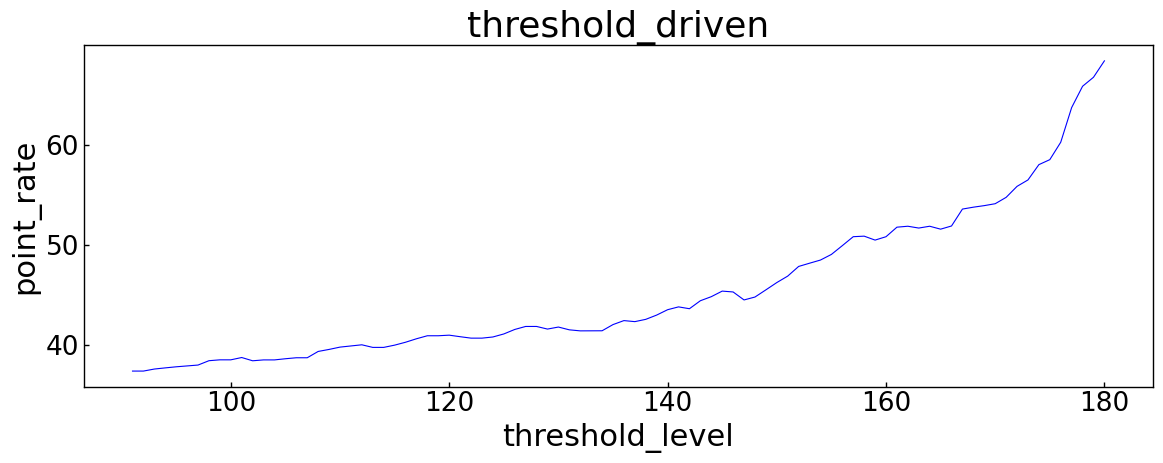

plusPoint:  4
[62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.35390803045521, 62.024960662034154, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.73058734134505, 61.65551226626997, 61.65551226626997, 61.55511065984427, 61.55511065984427, 61.379633978343485, 61.379633978343485, 61.379633978343485, 61.379633978343485, 61.22948382819334, 61.22948382819334, 61.22948382819334, 61.11983470538632, 61.11983470538632, 61.031182223116815, 60.95610714804174, 60.95610714804174, 60.8557055

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

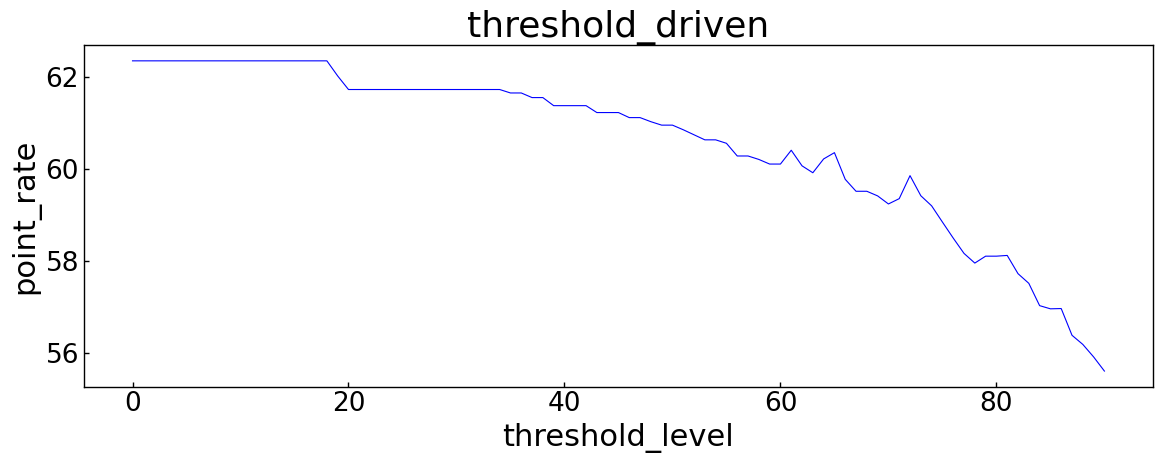

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[42.07712405871784, 42.07712405871784, 42.26184825659994, 42.37149737940696, 42.47189898583266, 42.546974060907736, 42.622049135982806, 43.02607157947894, 43.101146654554015, 43.101146654554015, 43.320444900168056, 42.91883847446523, 42.99391354954031, 42.99391354954031, 43.10356267234732, 43.19221515461683, 43.19221515461683, 43.77171427961374, 43.95643847749583, 44.17573672310987, 44.285385845916885, 44.395034968723905, 44.03151355257091, 44.03151355257091, 44.241564281803626, 44.5013635547608, 44.83031092318185, 45.10368760333345, 45.10368760333345, 45.03453950786956, 44.83464081399496, 44.58076852064899, 44.492116038379486, 44.6017651611865, 44.87514184133809, 45.29524329980353, 45.56861997995513, 45.56861997995513, 45.26831967965483, 45.45304387753692, 45.02209781389209, 44.75248380100712, 44.67125055208071, 44.577594854261434, 45.140427229533934, 45.50062810891681, 45.1969024367802, 45.31329746819365, 45.70807239530846, 46.1281738537739, 46.378725610349754, 46.04134965454263, 46.

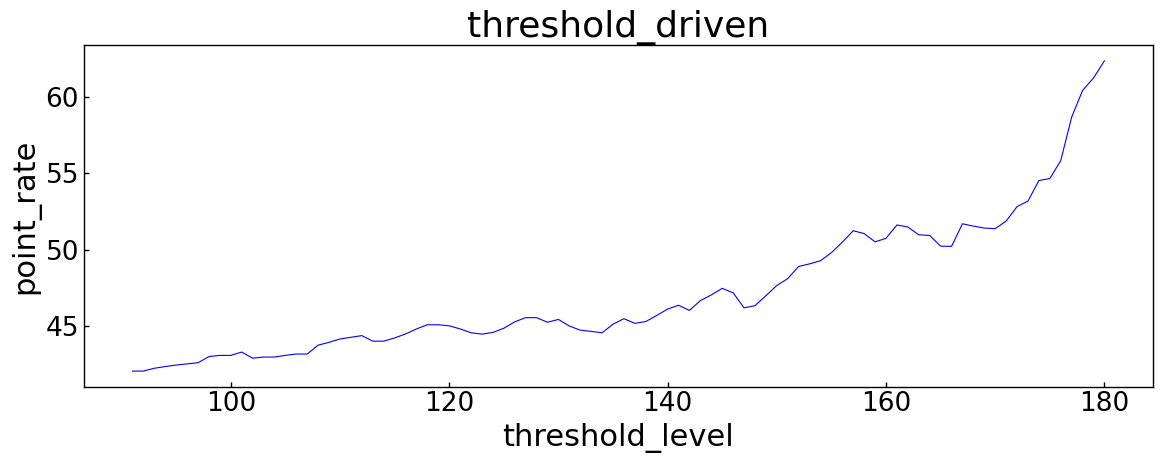

plusPoint:  5
[57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.4083026164723, 57.0958026164723, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.82167980945475, 56.75589033577054, 56.75589033577054, 56.66260675368099, 56.66260675368099, 56.50353369790722, 56.50353369790722, 56.50353369790722, 56.50353369790722, 56.371954750538805, 56.371954750538805, 56.371954750538805, 56.26778808387214, 56.26778808387214, 56.187659878743936, 56.121870405059724, 56.121870405059724, 56.028586822970176, 55.9244201

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

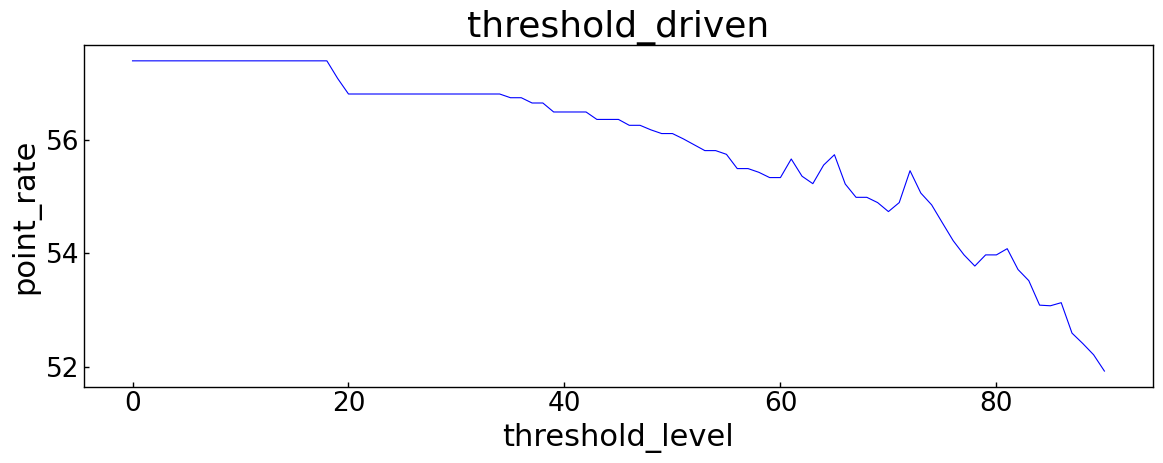

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[45.978539740568415, 45.978539740568415, 46.14849588091929, 46.25266254758596, 46.34594612967551, 46.41173560335972, 46.477525077043936, 46.85581455072814, 46.92160402441235, 46.92160402441235, 47.12993735774568, 46.66351944729792, 46.729308920982135, 46.729308920982135, 46.833475587648806, 46.91360379277701, 46.91360379277701, 47.45096632223498, 47.62092246258585, 47.82925579591919, 47.93342246258585, 48.037589129252524, 47.5825452696034, 47.5825452696034, 47.77999551835962, 48.01574113239471, 48.32824113239471, 48.57832547787379, 48.57832547787379, 48.397404425242215, 48.161740638910715, 47.810863445928256, 47.65060703567185, 47.75477370233851, 48.00485804781759, 48.39975854533003, 48.64984289080911, 48.64984289080911, 48.32089552238806, 48.49085166273893, 47.92953249944608, 47.52652476483976, 47.37596808467783, 47.1980117126916, 47.714791427478, 48.043820623602635, 47.5821927810341, 47.601686657804095, 47.96909304691119, 48.29820407073942, 48.523066600197396, 48.0601861643201, 48.57

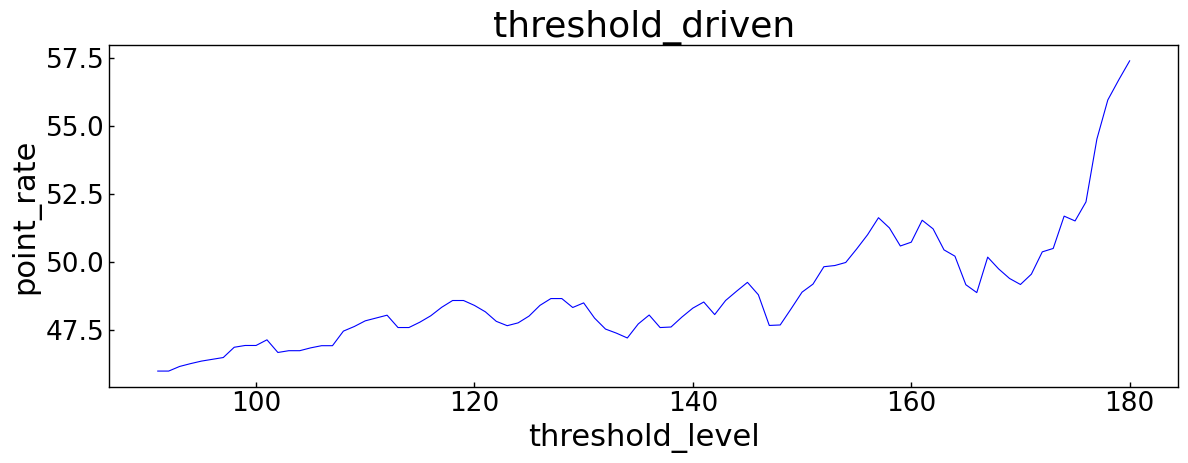

In [47]:
kinect_file_name = "data/kinect_uww2021.csv"
ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree = degree(kinect_file_name)
degree_list = [ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree]
start_timing = 280
small_threshold_list = list(range(91))
large_threshold_list = list(range(91, 181))

for plusPoint in range(1, 6):
    print('plusPoint: ', plusPoint)
    accuracy_list = [0 for _ in range(len(small_threshold_list))]
    for index, th in enumerate(small_threshold_list):
        max_average = 0
        for i in range(4):
            accel_data = kinect_timing_move(degree_list[i], start_timing, th, 180)
            accuracy_graph, accuracy_num = CompareSimilarlyListWithHandmade(accel_data, partsList[i+4])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(accel_data, partsList[i+4], plusPoint)
            max_average += tmp_accuracy
        accuracy_list[index] = max_average / 4
            # print('accuracy:', tmp_accuracy, ' plusPoint:', plusPoint)
    print(accuracy_list[:100])
    XY_to_figure('threshold_driven', 'threshold_level', small_threshold_list, 'point_rate', accuracy_list)

    accuracy_list = [0 for _ in range(len(large_threshold_list))]
    for index, th in enumerate(large_threshold_list):
        max_average = 0
        for i in range(4):
            accel_data = kinect_timing_move(degree_list[i], start_timing, 0, th)
            accuracy_graph, accuracy_num = CompareSimilarlyListWithHandmade(accel_data, partsList[i+4])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(accel_data, partsList[i+4], plusPoint)
            max_average += tmp_accuracy
        accuracy_list[index] = max_average / 4
            # print('accuracy:', tmp_accuracy, ' plusPoint:', plusPoint)
    print(accuracy_list[:100])
    XY_to_figure('threshold_driven', 'threshold_level', large_threshold_list, 'point_rate', accuracy_list)

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 1


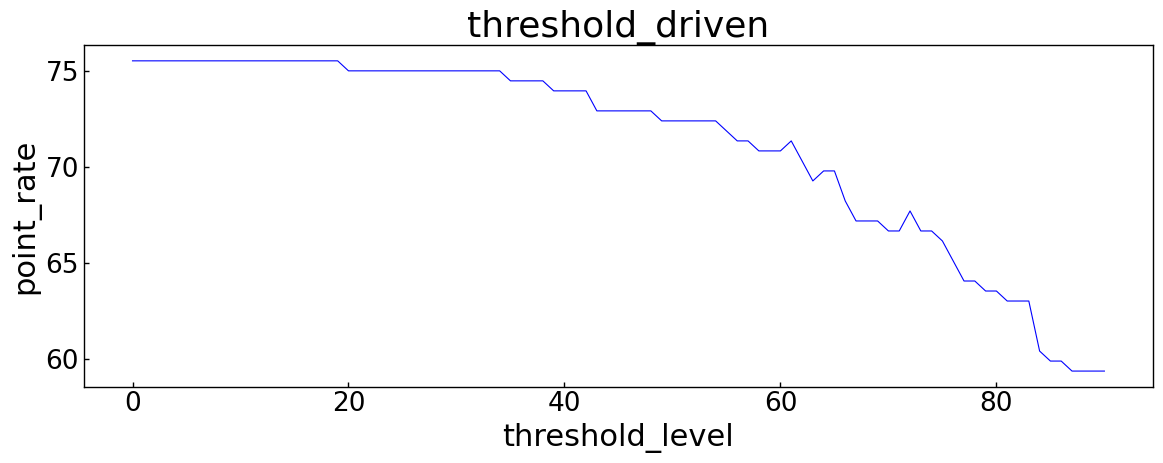

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

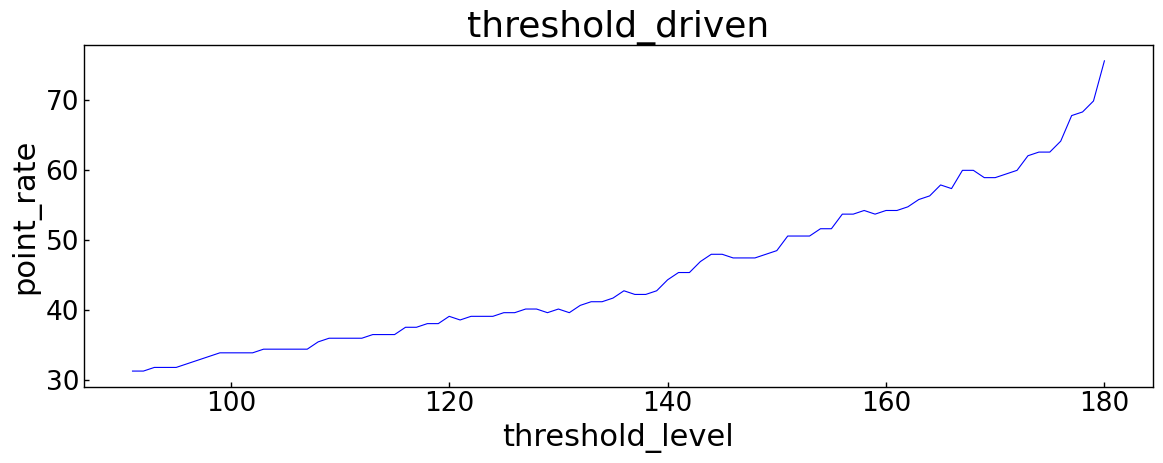

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 2


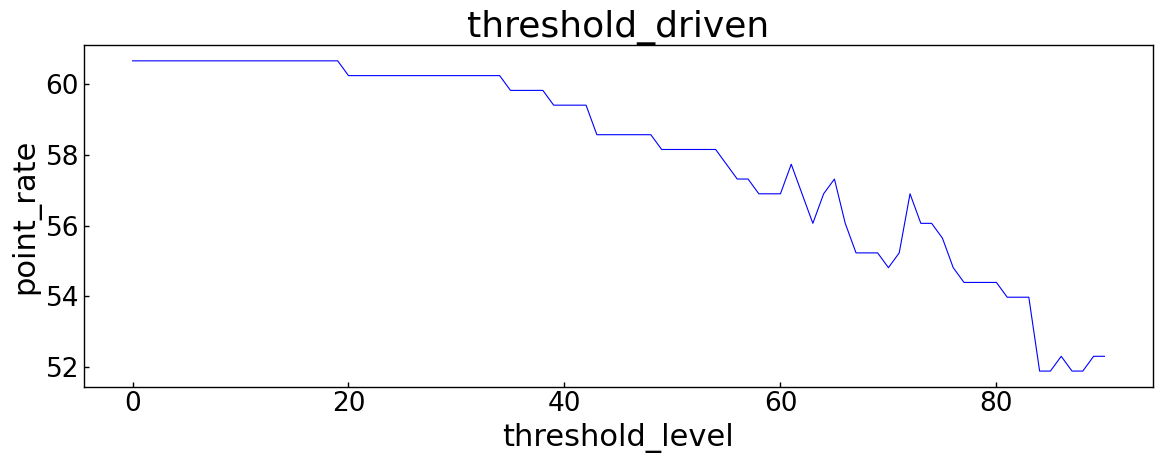

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

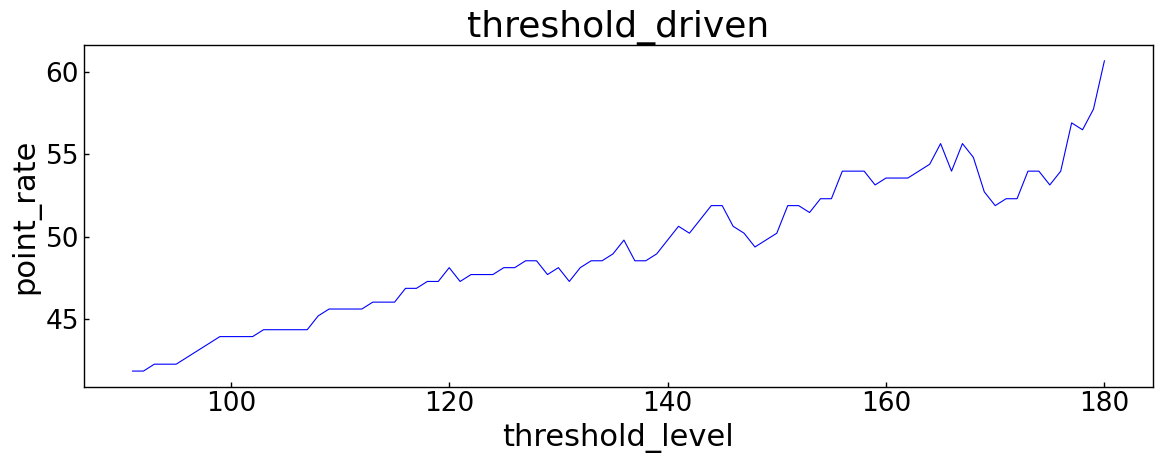

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 3


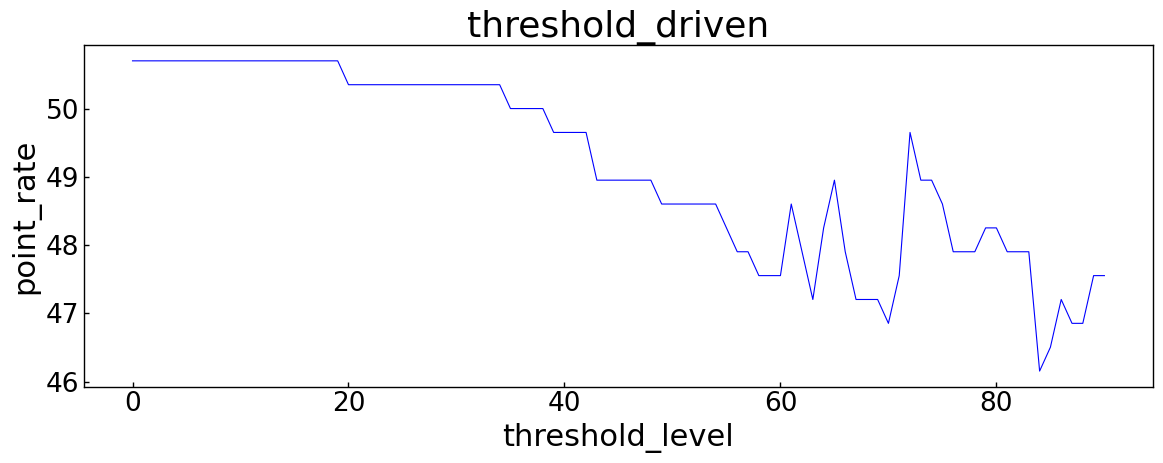

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

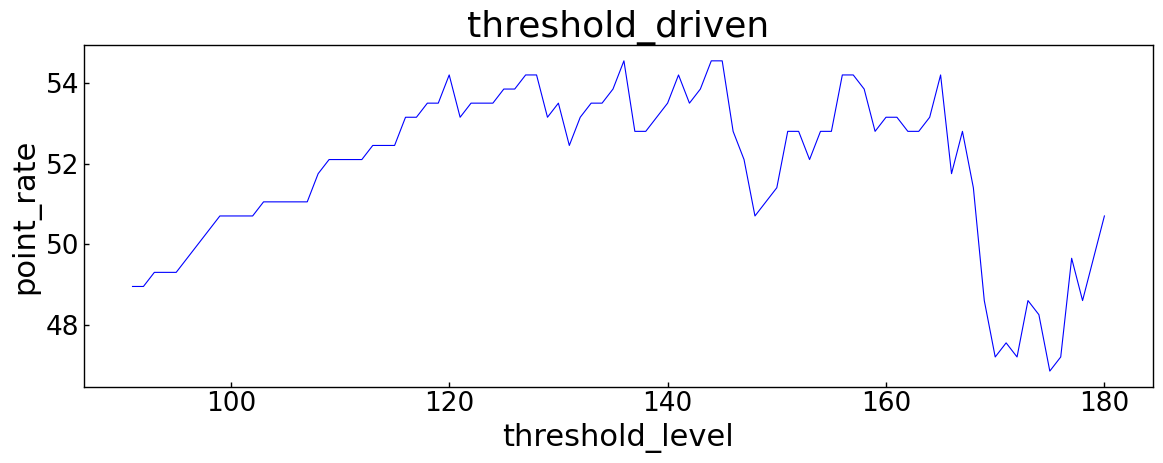

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 4


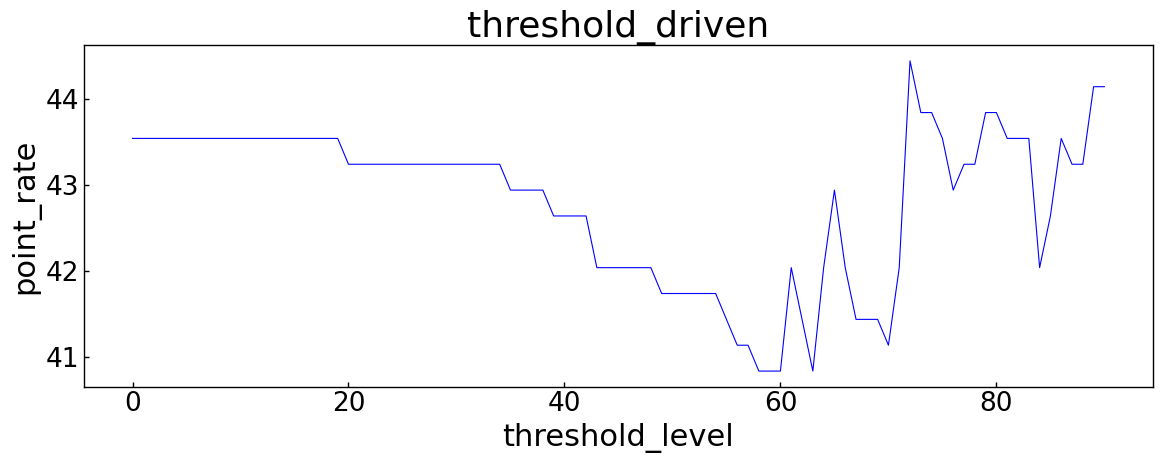

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

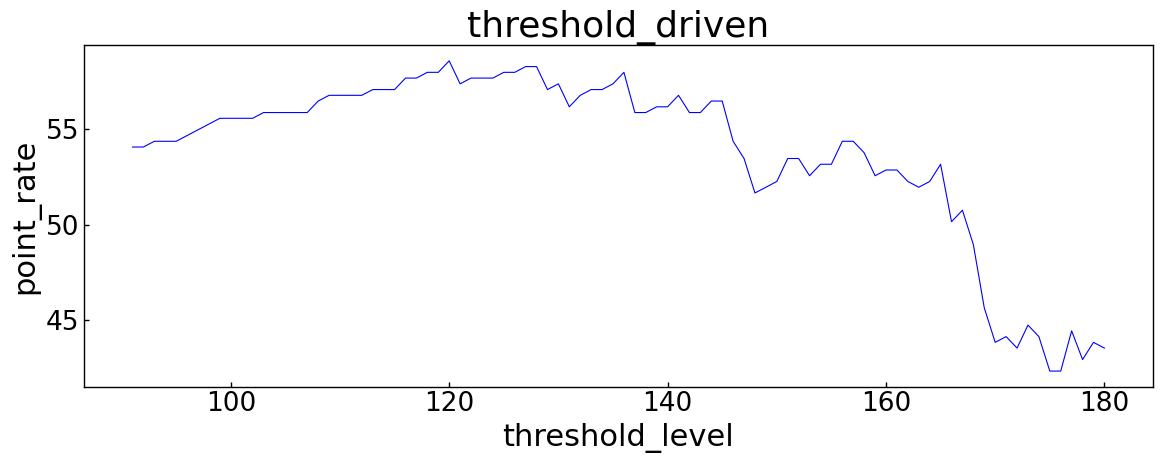

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 5


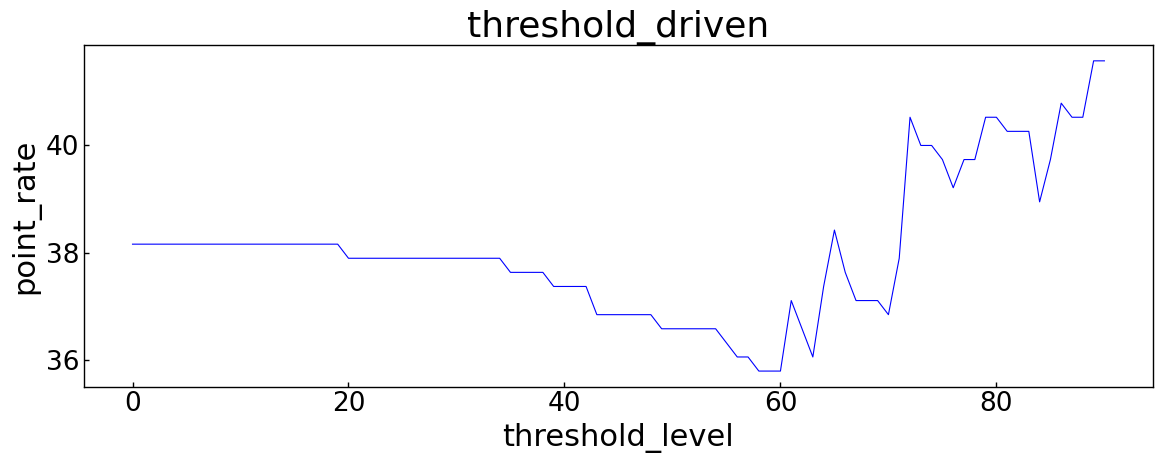

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

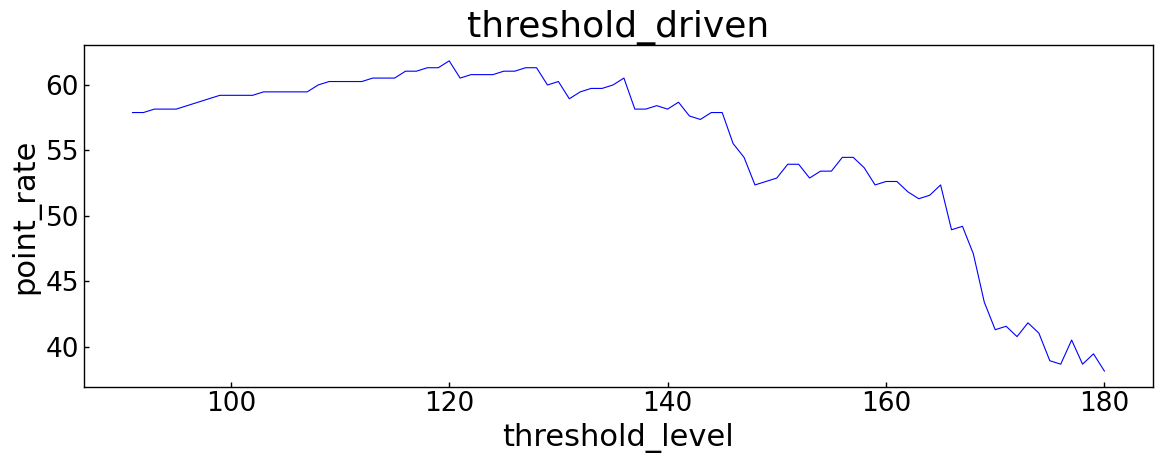

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 1


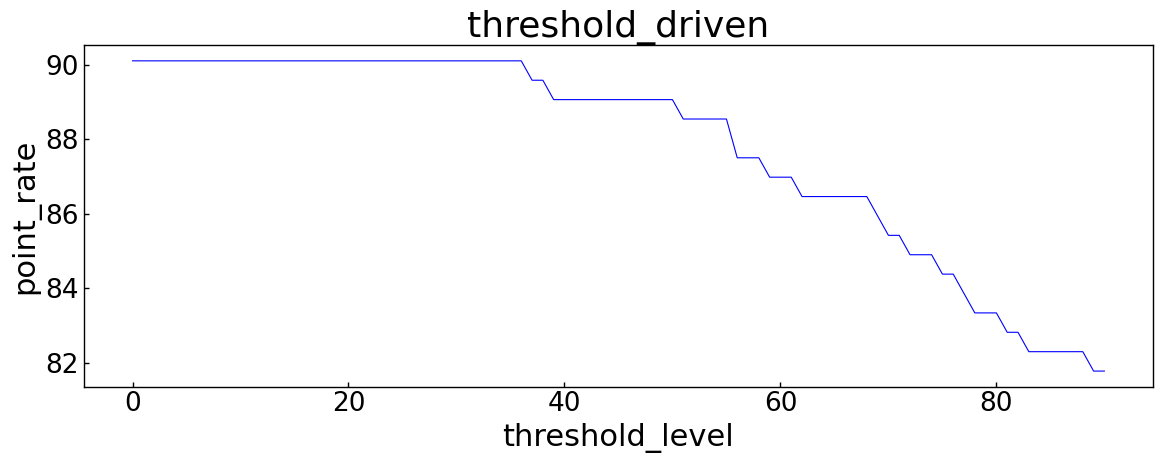

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

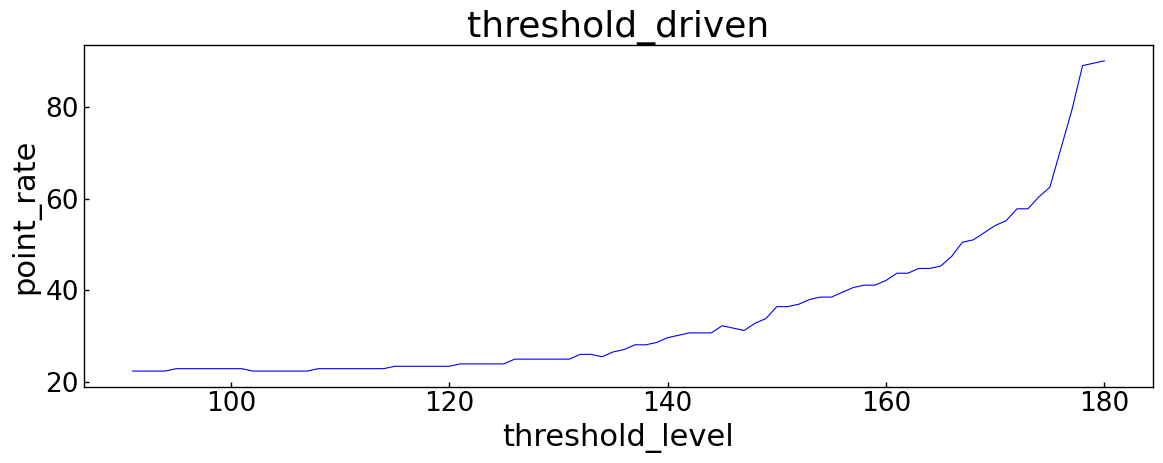

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 2


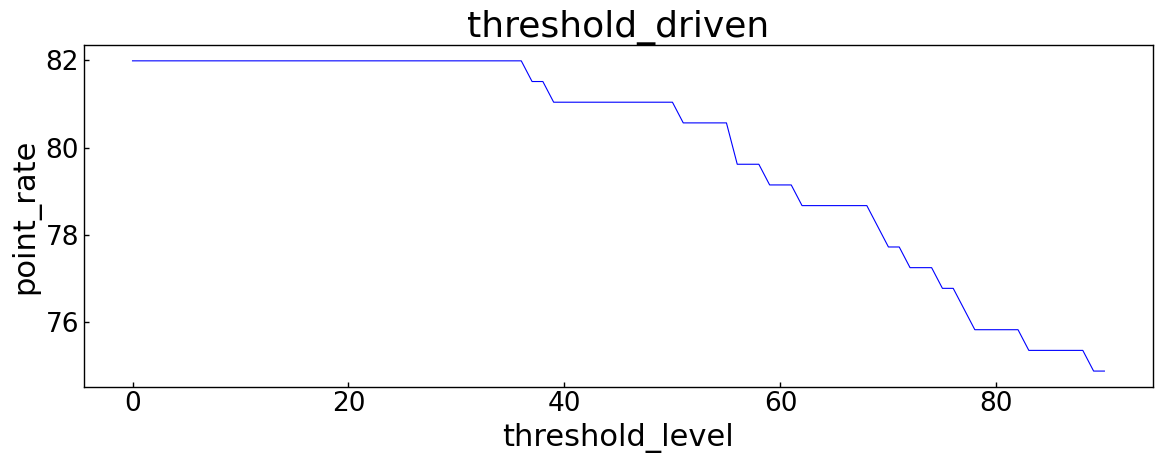

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

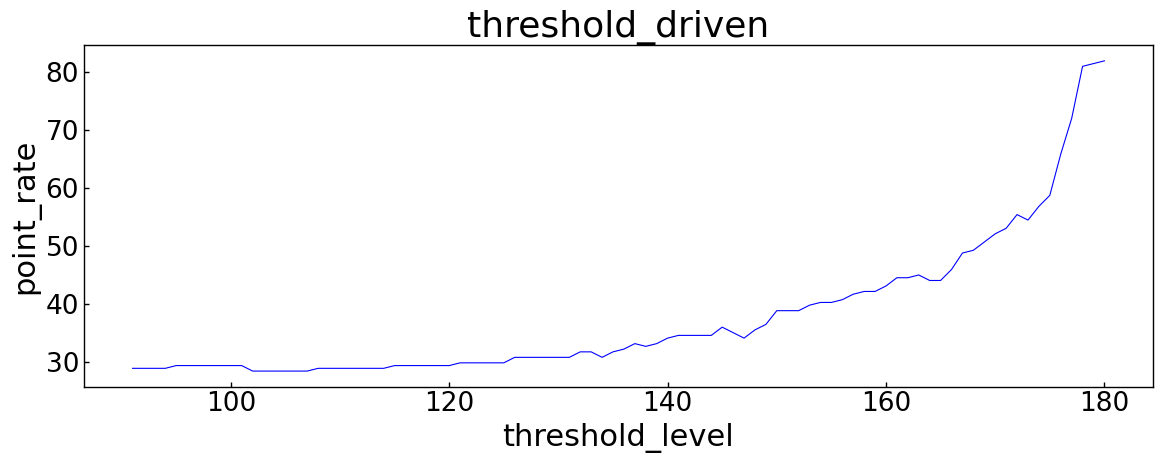

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 3


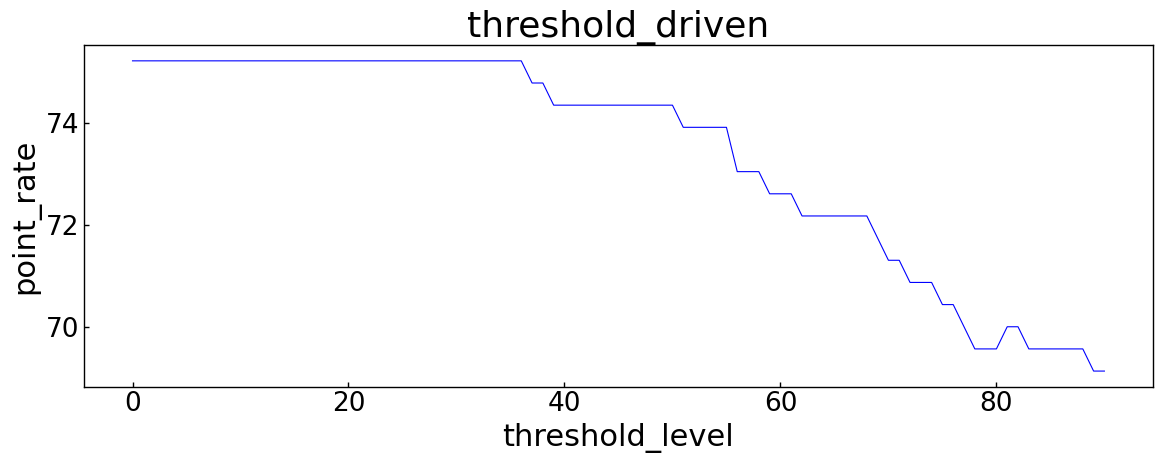

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

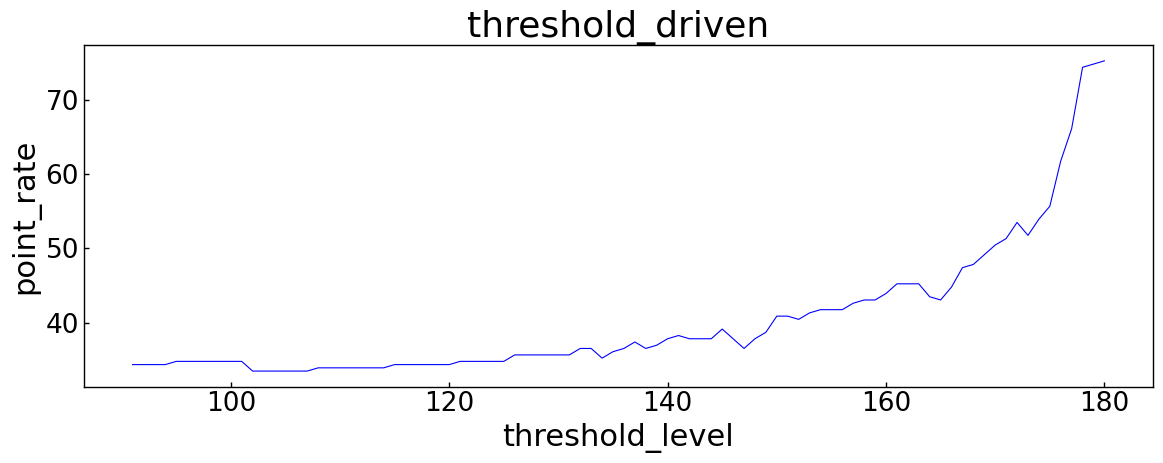

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 4


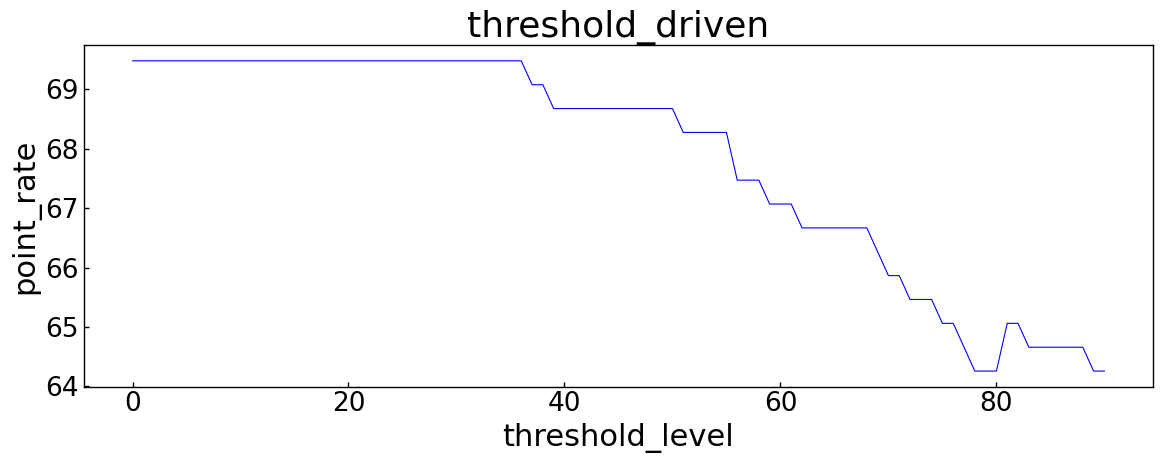

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

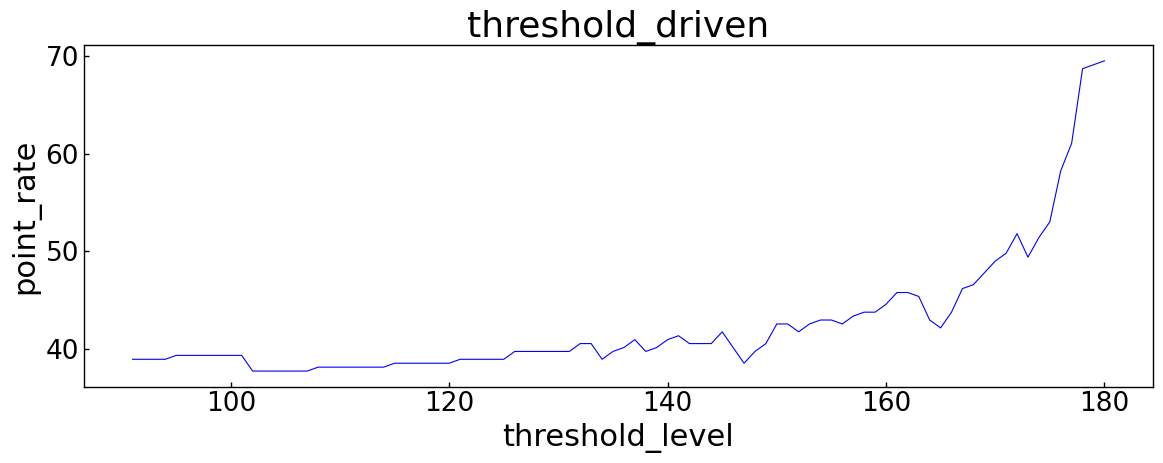

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 5


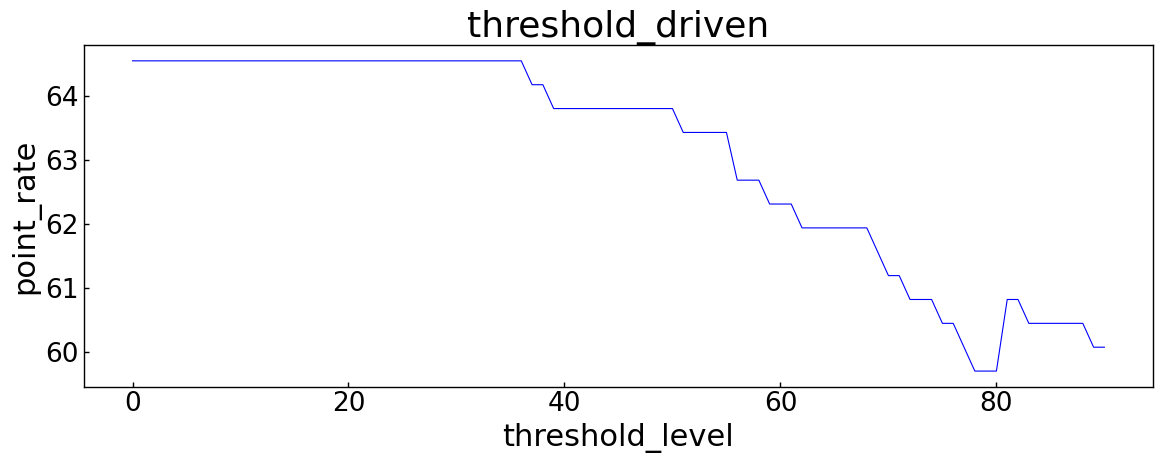

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

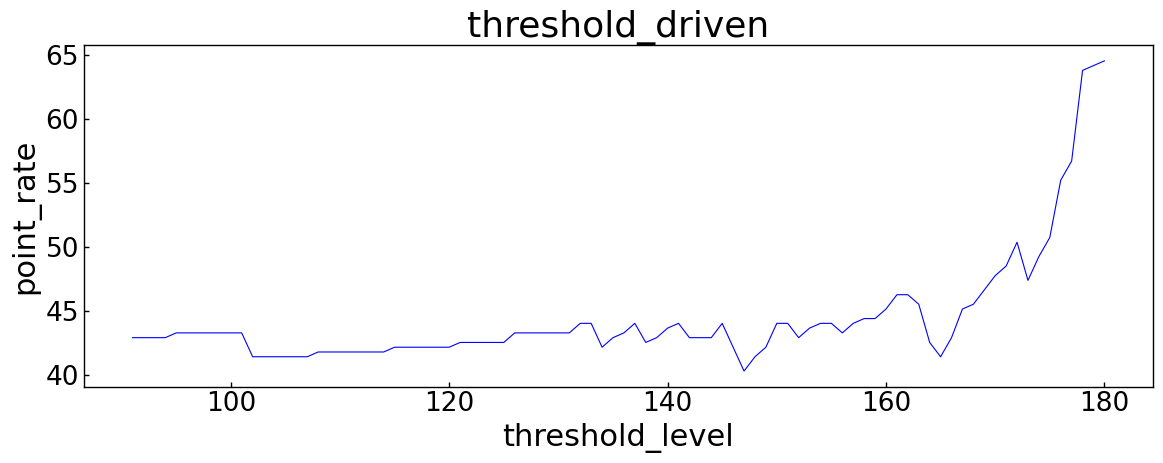

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 1


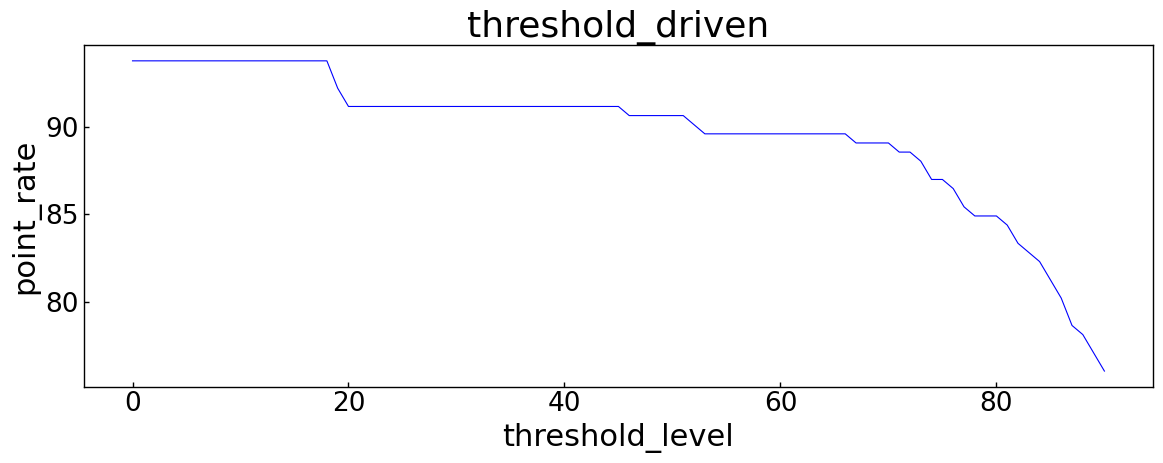

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

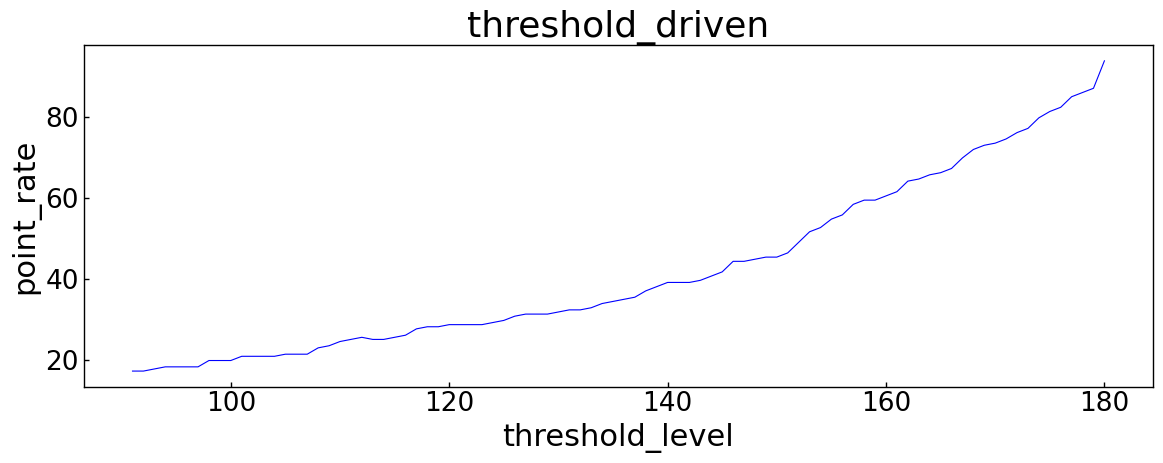

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 2


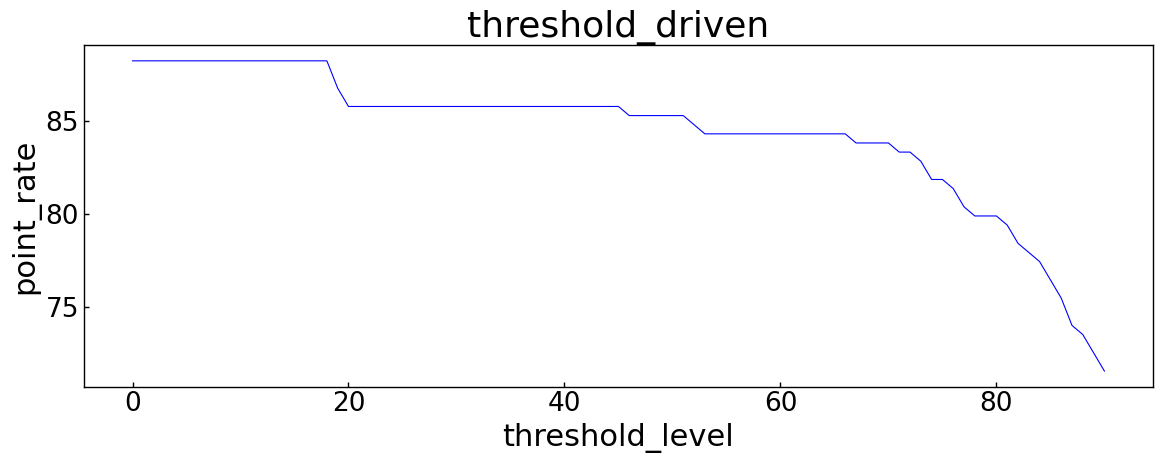

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

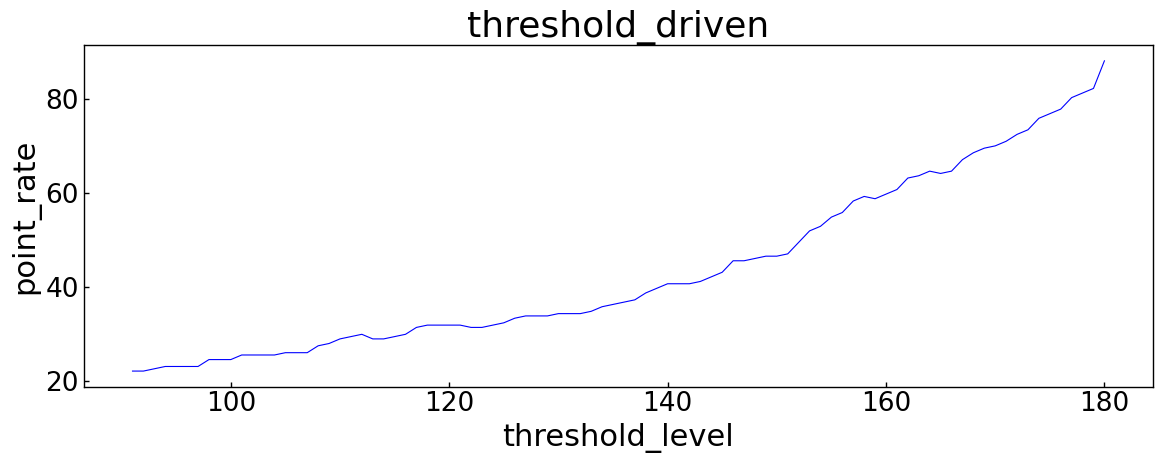

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 3


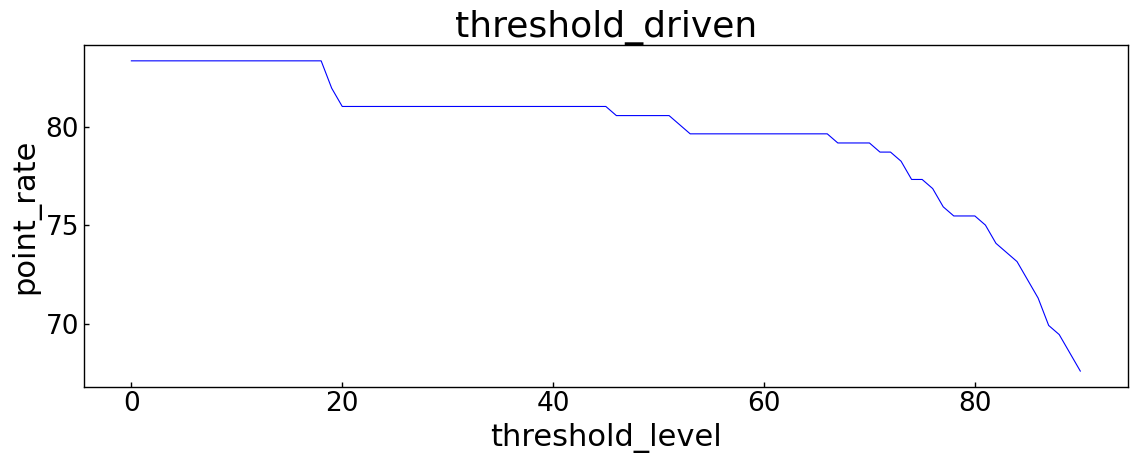

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

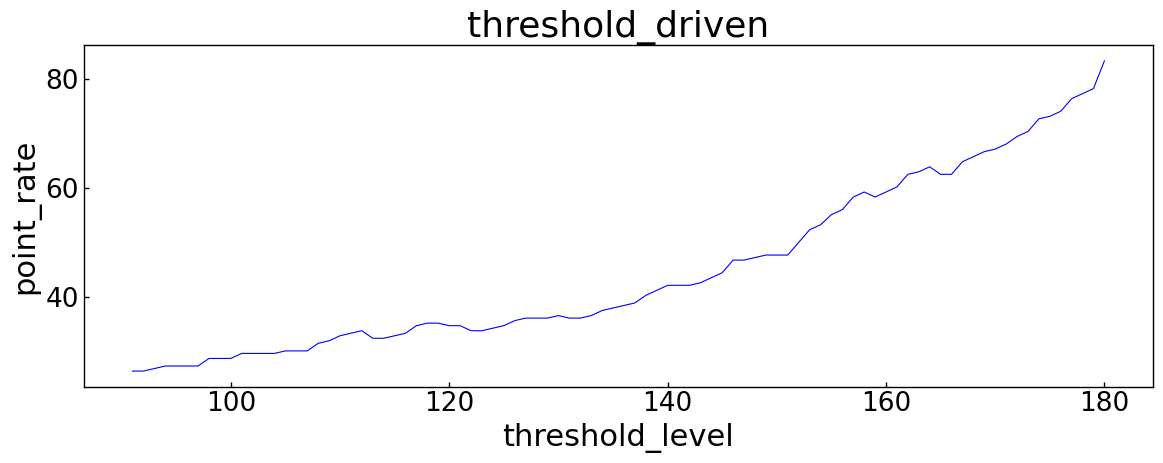

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 4


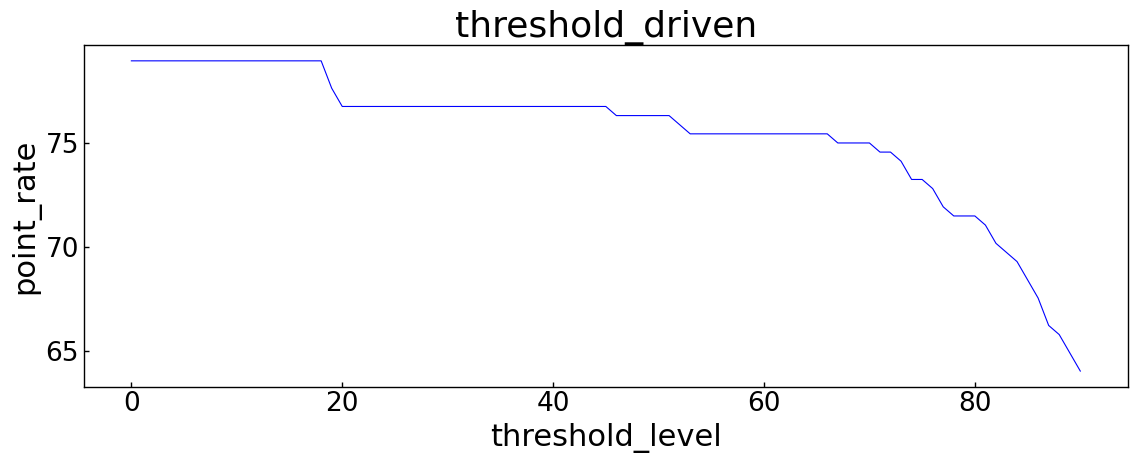

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

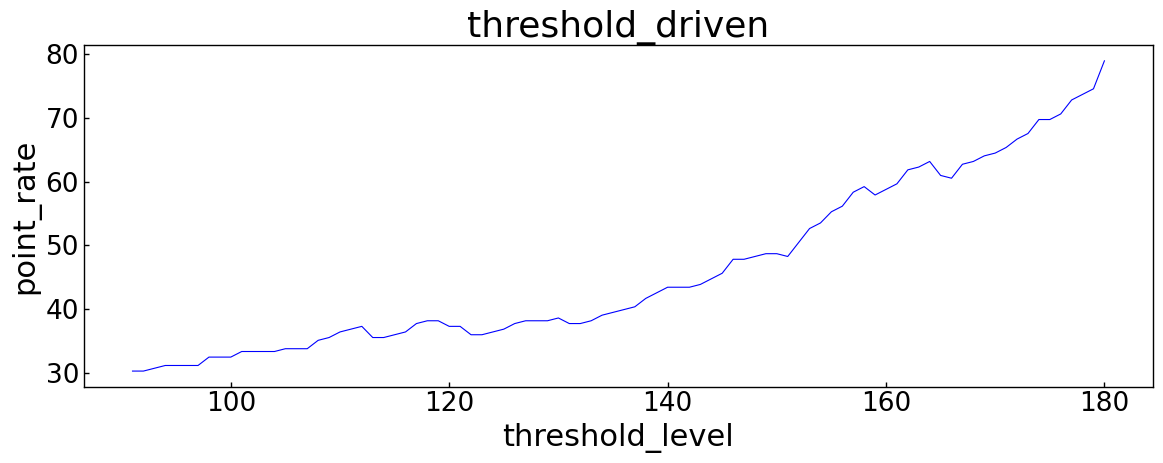

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 5


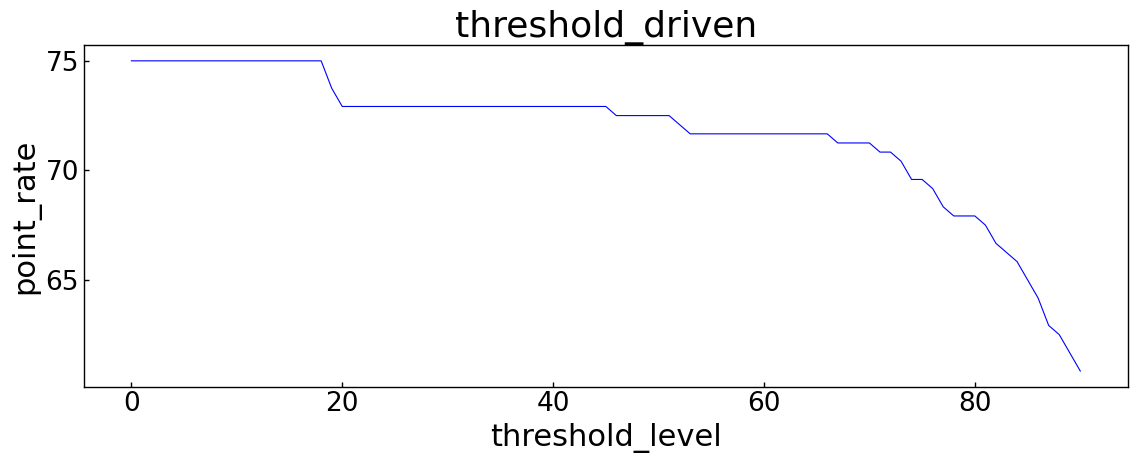

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

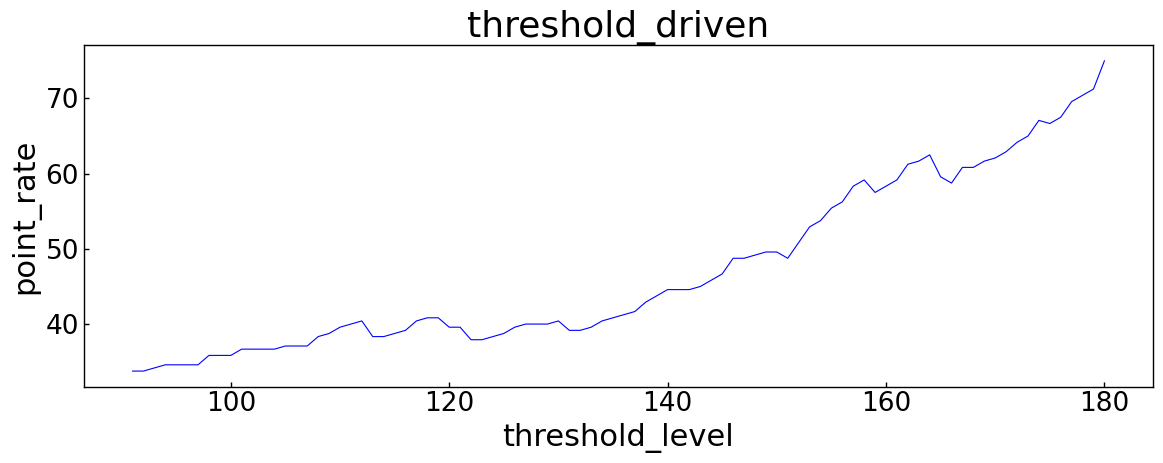

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 1


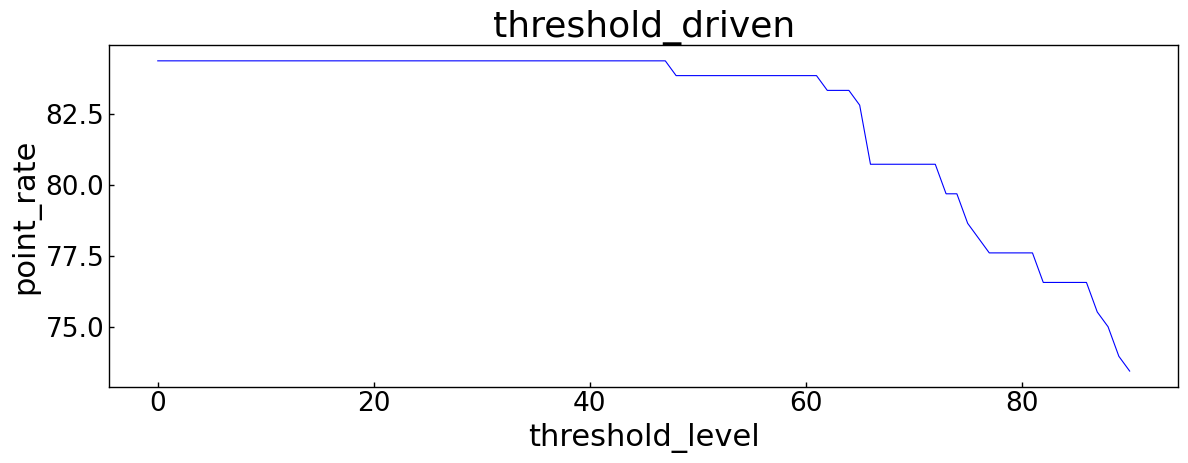

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

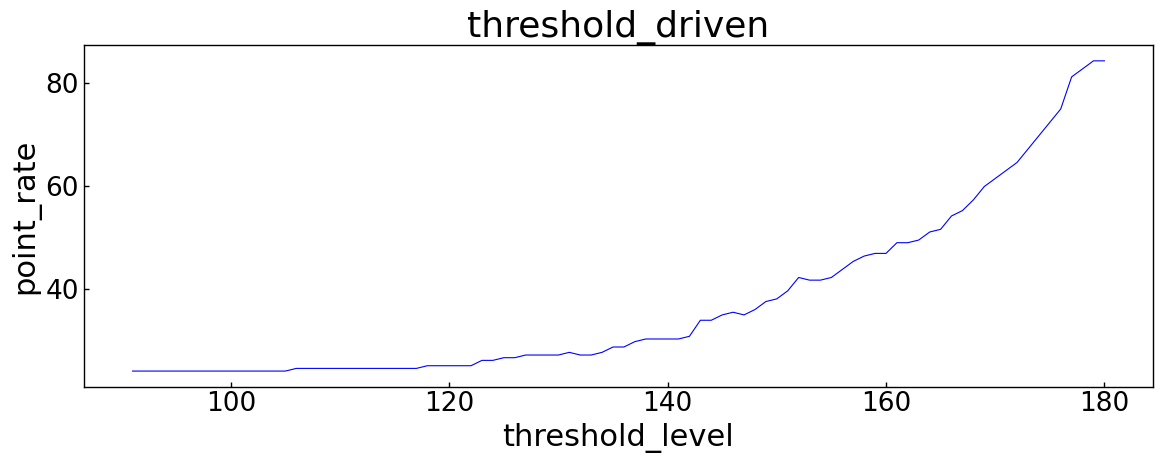

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 2


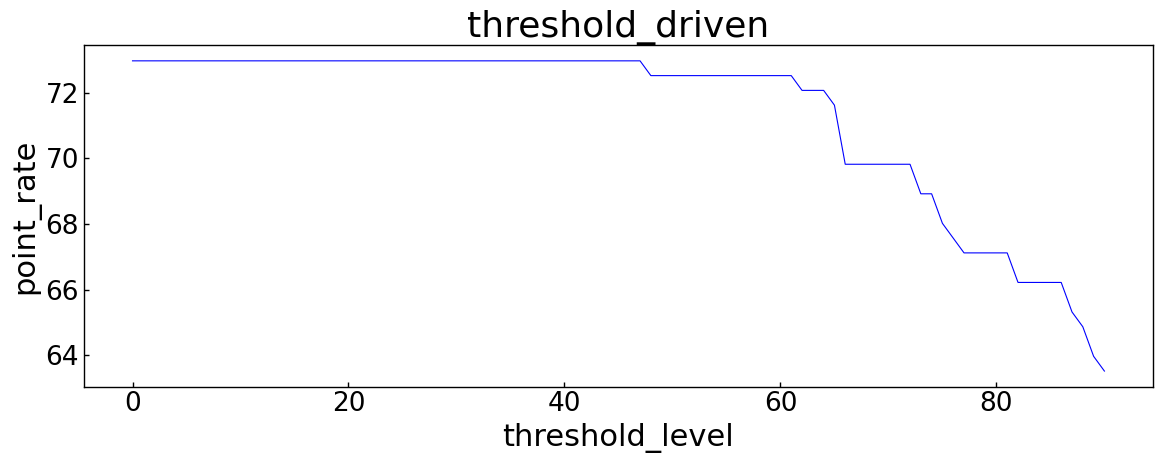

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

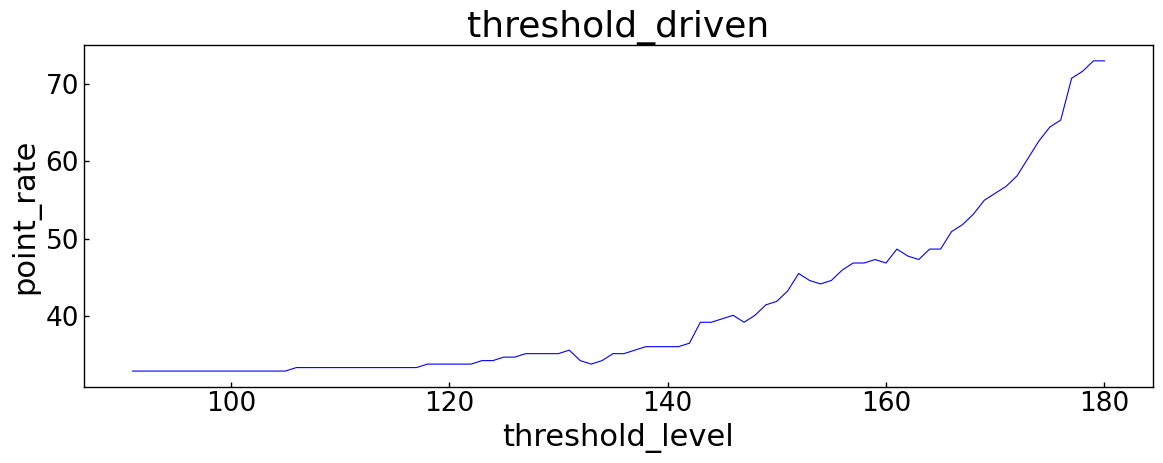

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 3


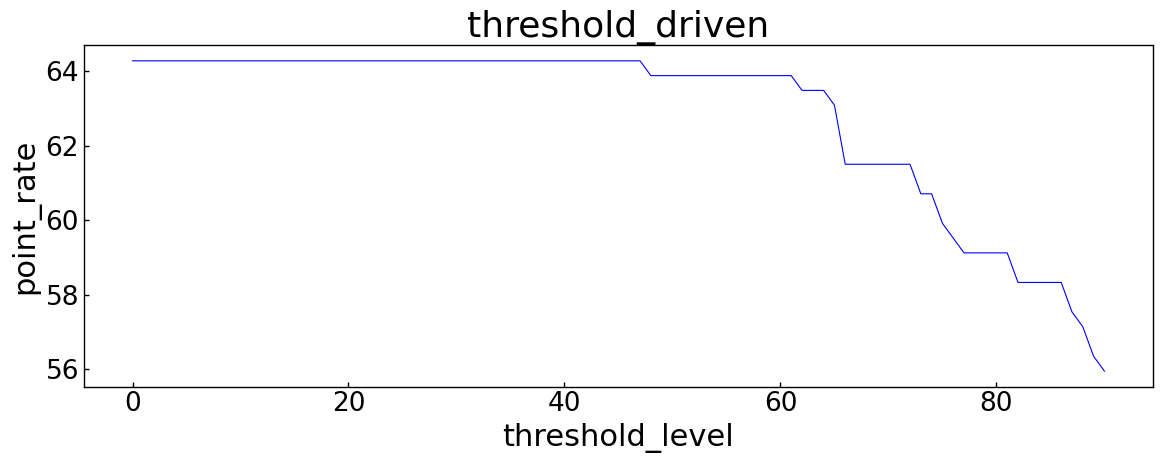

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

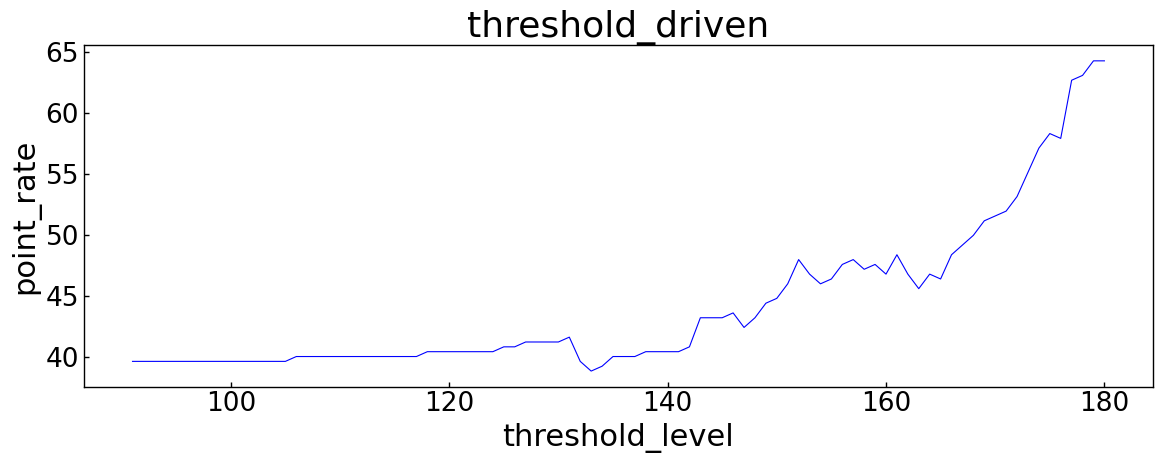

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 4


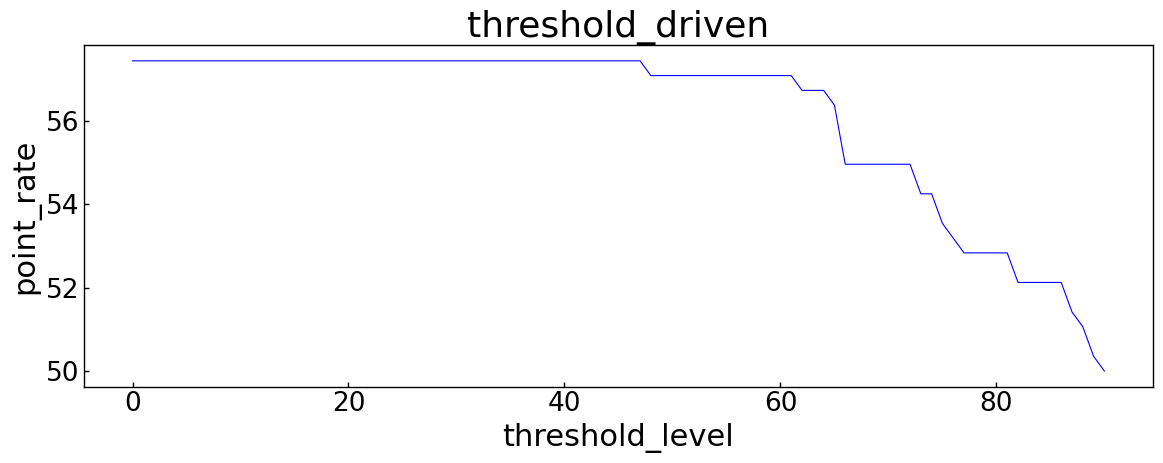

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

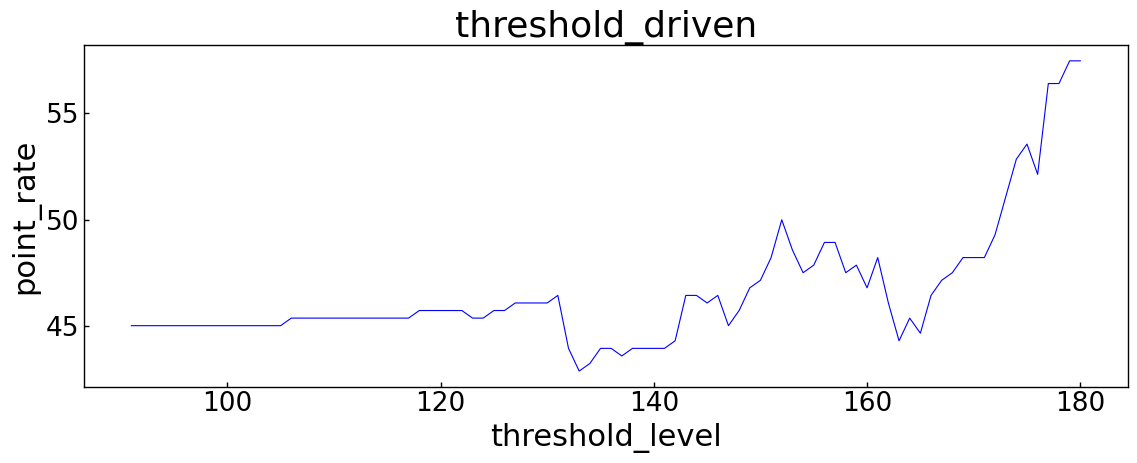

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

pluspoint: 5


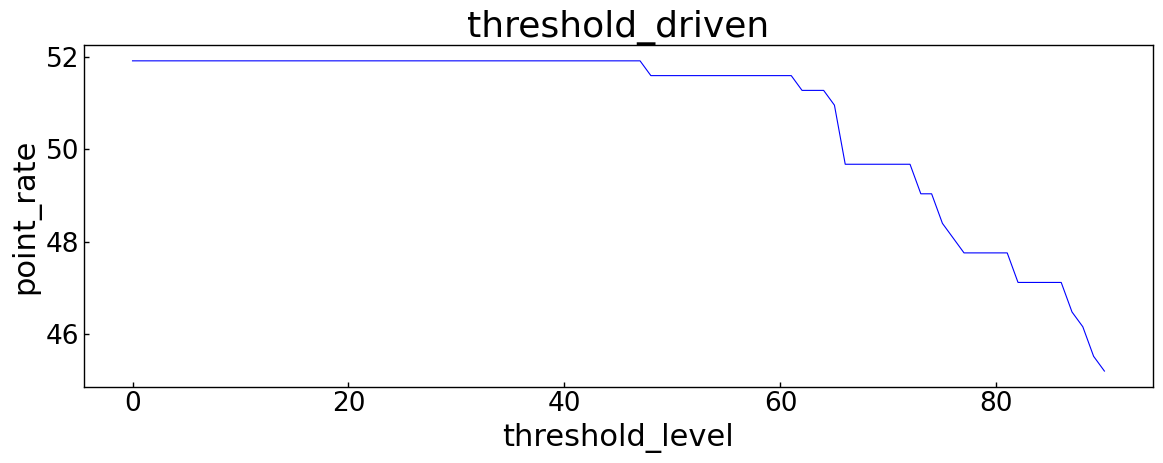

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

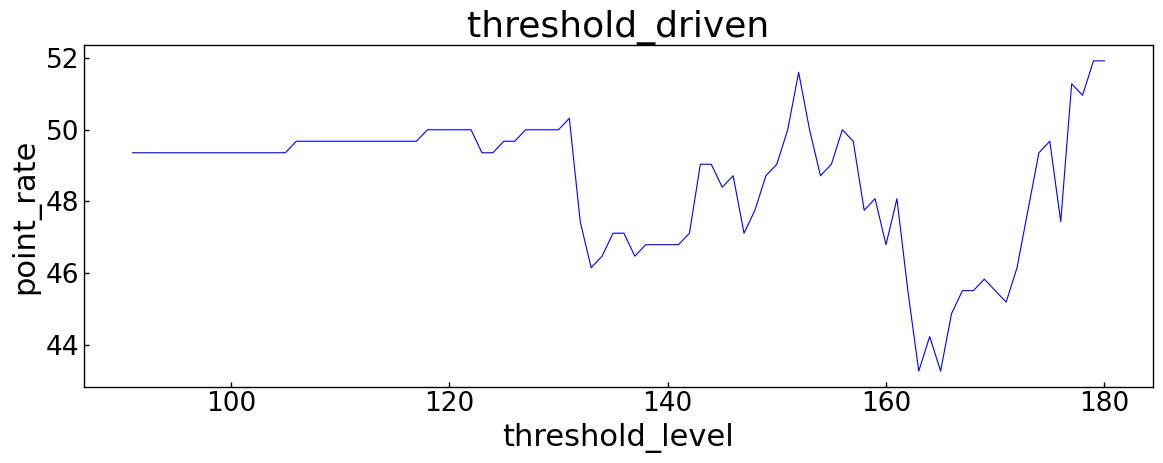

In [46]:
kinect_file_name = "data/kinect_uww2021.csv"
ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree = degree(kinect_file_name)
degree_list = [ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree]
start_timing = 280
smallTh = 30
largeTh = 160

small_threshold_list = list(range(91))
large_threshold_list = list(range(91, 181))
all_threshold_list = list(range(1890))

for i in range(4):
    for plusPoint in range(1, 6):
        small_list = []
        print('pluspoint:',plusPoint)
        for sTh in small_threshold_list:
            kinect_similarly_data = kinect_timing_move(degree_list[i], start_timing, sTh, 180)
            kinect_accuracy_graph, kinect_accuracy_num = CompareSimilarlyListWithHandmade(kinect_similarly_data, partsList[i+4])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(kinect_similarly_data, partsList[i+4], plusPoint)
            small_list.append(tmp_accuracy)
        XY_to_figure('threshold_driven', 'threshold_level', small_threshold_list, 'point_rate', small_list)
        large_list = []
        for lTh in large_threshold_list:
            kinect_similarly_data = kinect_timing_move(degree_list[i], start_timing, 0, lTh)
            kinect_accuracy_graph, kinect_accuracy_num = CompareSimilarlyListWithHandmade(kinect_similarly_data, partsList[i+4])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(kinect_similarly_data, partsList[i+4], plusPoint)
            large_list.append(tmp_accuracy)
        XY_to_figure('threshold_driven', 'threshold_level', large_threshold_list, 'point_rate', large_list)

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

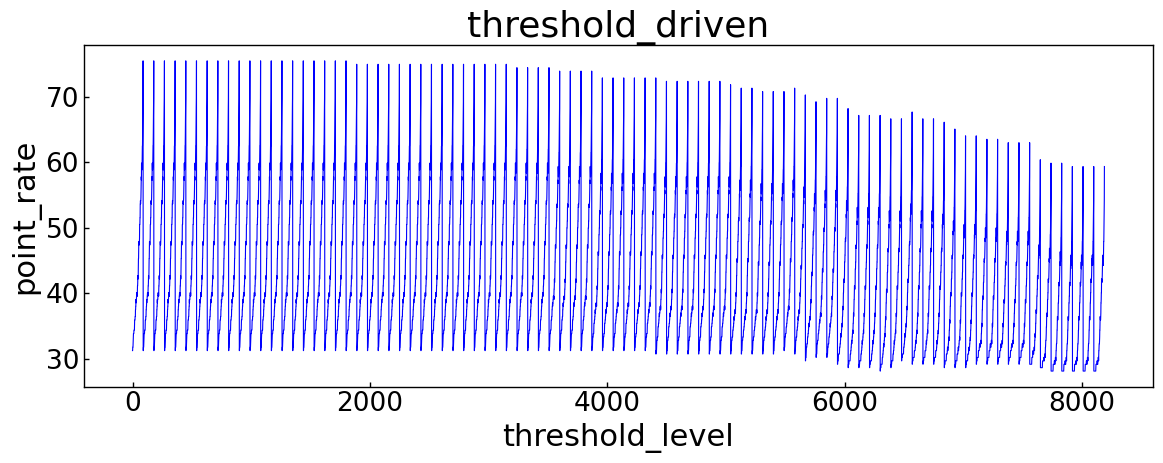

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

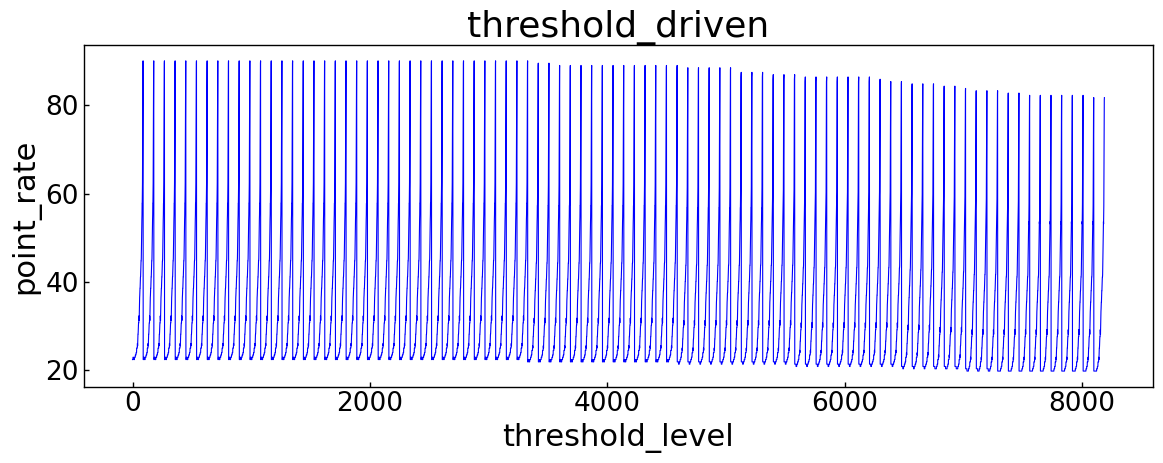

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

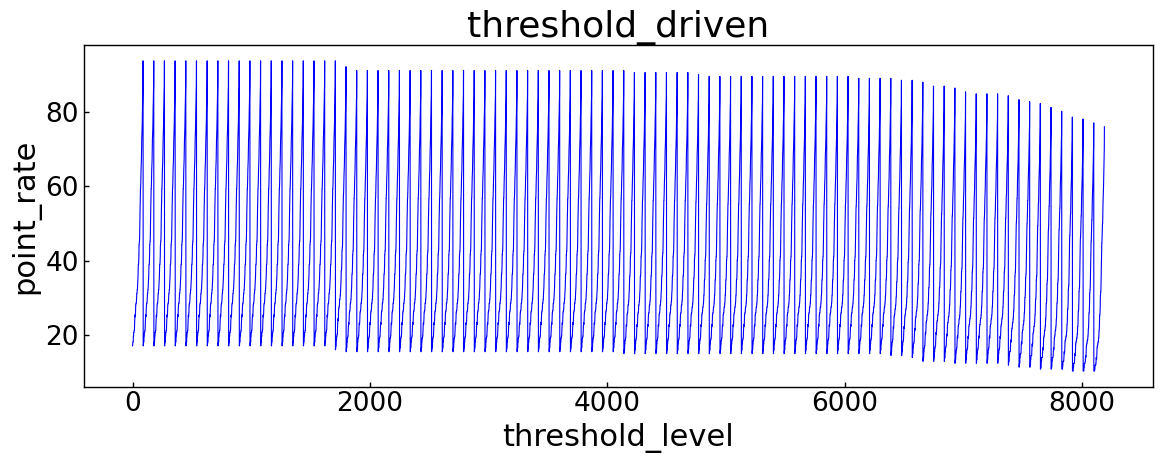

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

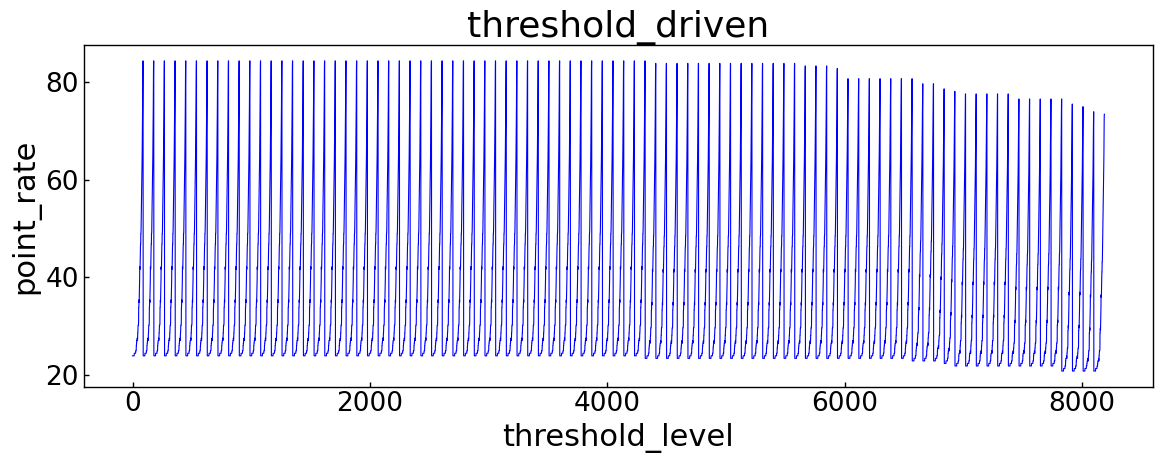

In [41]:
kinect_file_name = "data/kinect_uww2021.csv"
ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree = degree(kinect_file_name)
degree_list = [ELBOW_RIGHT_degree, KNEE_RIGHT_degree, ELBOW_LEFT_degree, KNEE_LEFT_degree]
start_timing = 280
smallTh = 30
largeTh = 160

small_threshold_list = list(range(91))
large_threshold_list = list(range(91, 181))
all_threshold_list = list(range(8190))

for i in range(4):
    all_list = []
    for sTh in small_threshold_list:
        for lTh in large_threshold_list:
            kinect_similarly_data = kinect_timing_move(degree_list[i], start_timing, sTh, lTh)
            kinect_accuracy_graph, kinect_accuracy_num = CompareSimilarlyListWithHandmade(kinect_similarly_data, partsList[i+4])
            all_list.append(kinect_accuracy_num)
    XY_to_figure('threshold_driven', 'threshold_level', all_threshold_list, 'point_rate', all_list)

plusPoint:  1


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 25.520833333333332, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.041666666666668, 26.04

findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.


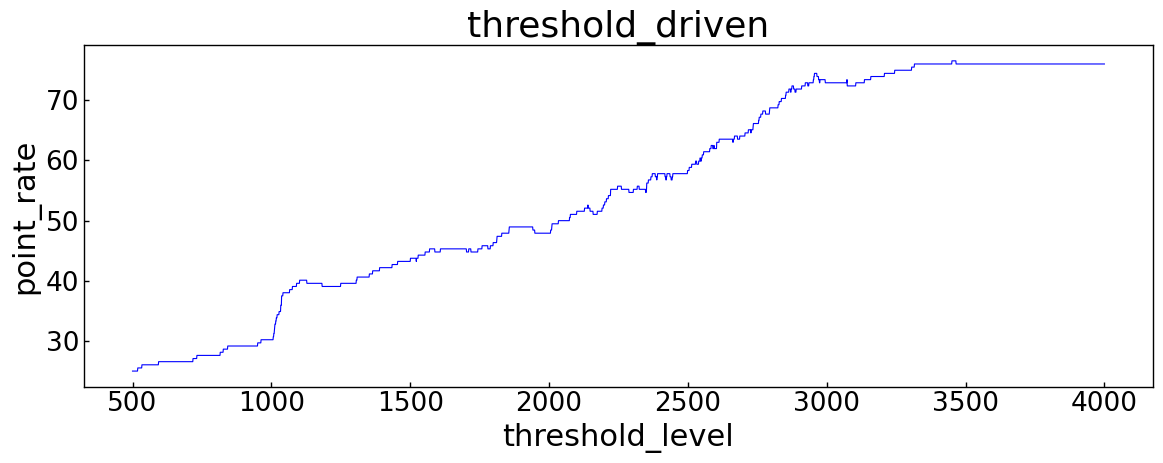

max_score_threshold: 3451


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666666667, 46.35416666

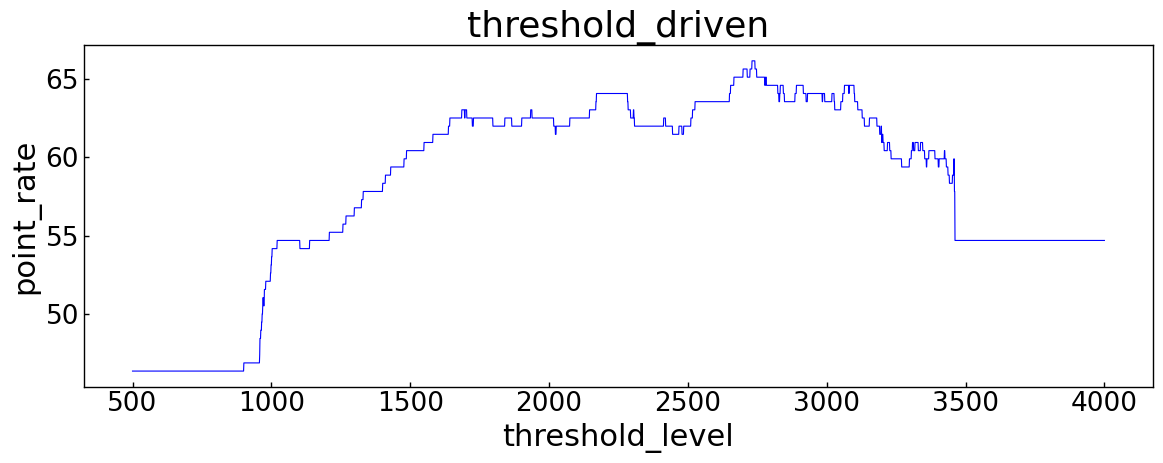

max_score_threshold: 2731


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.125, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333332, 28.645833333333

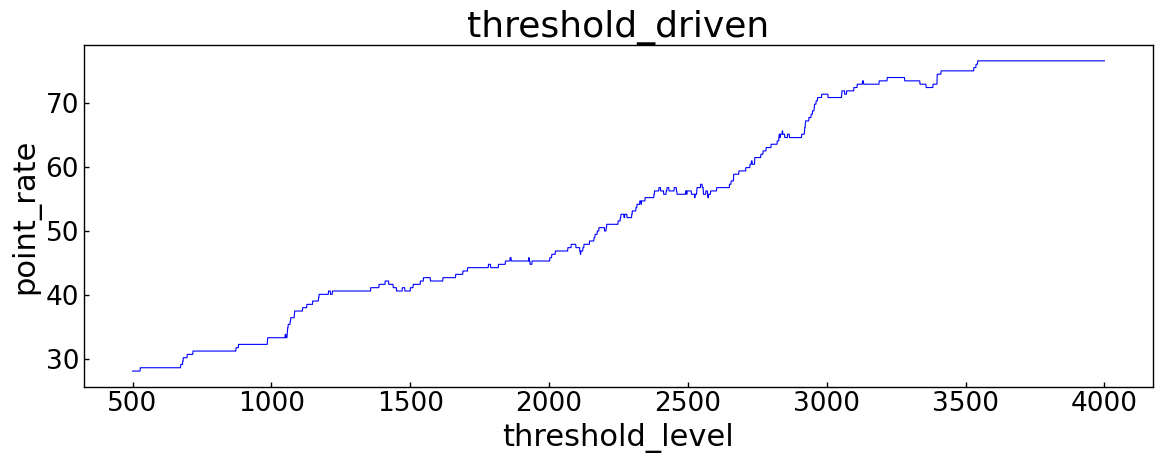

max_score_threshold: 3544


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375]


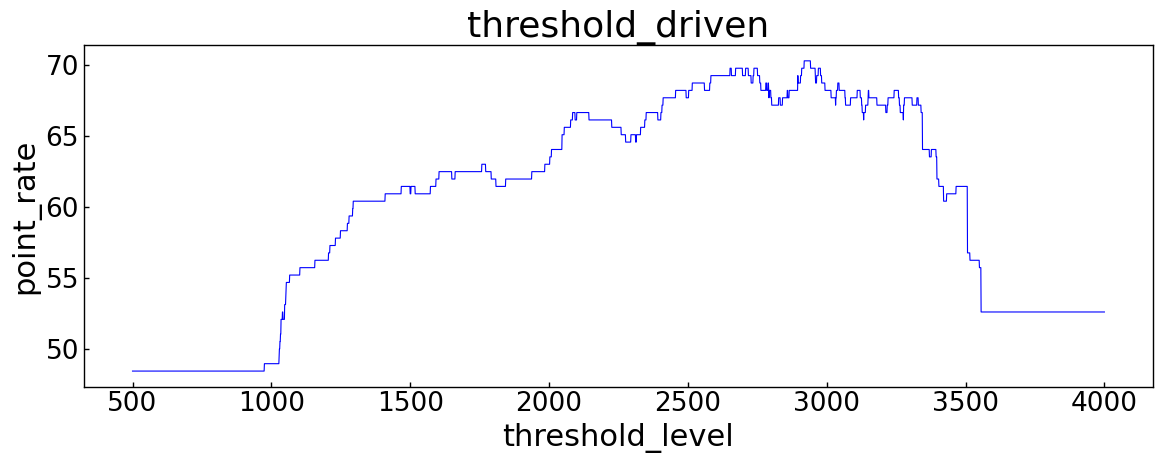

max_score_threshold: 2919
plusPoint:  2


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.49579831932773, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 39.91596638655462, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445378151, 40.33613445

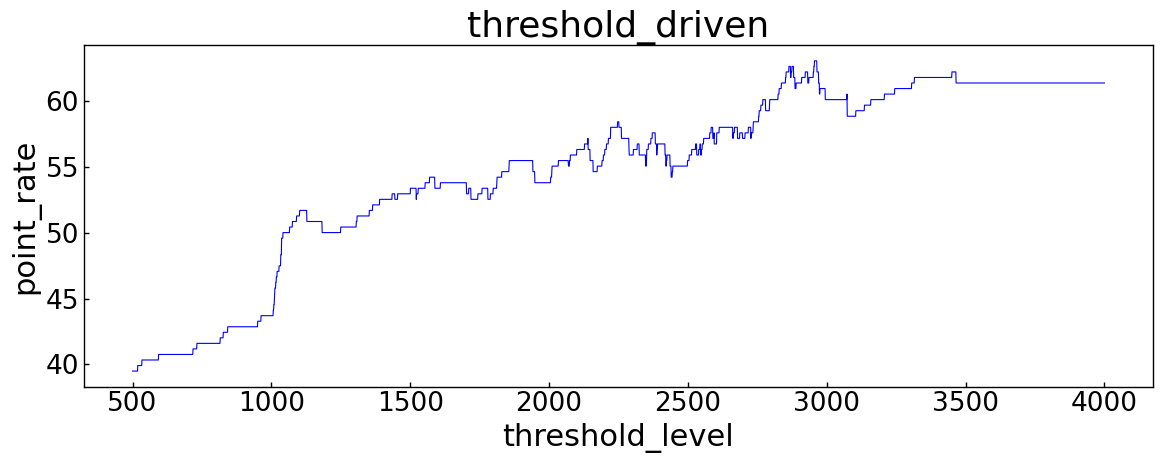

max_score_threshold: 2956


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727598566, 63.08243727

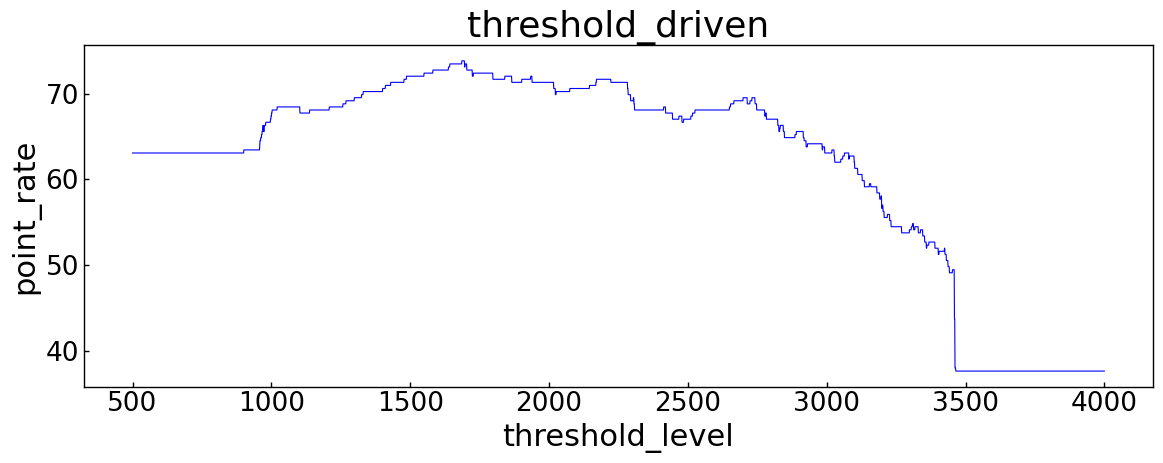

max_score_threshold: 1686


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.35021097046413, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189873418, 41.77215189

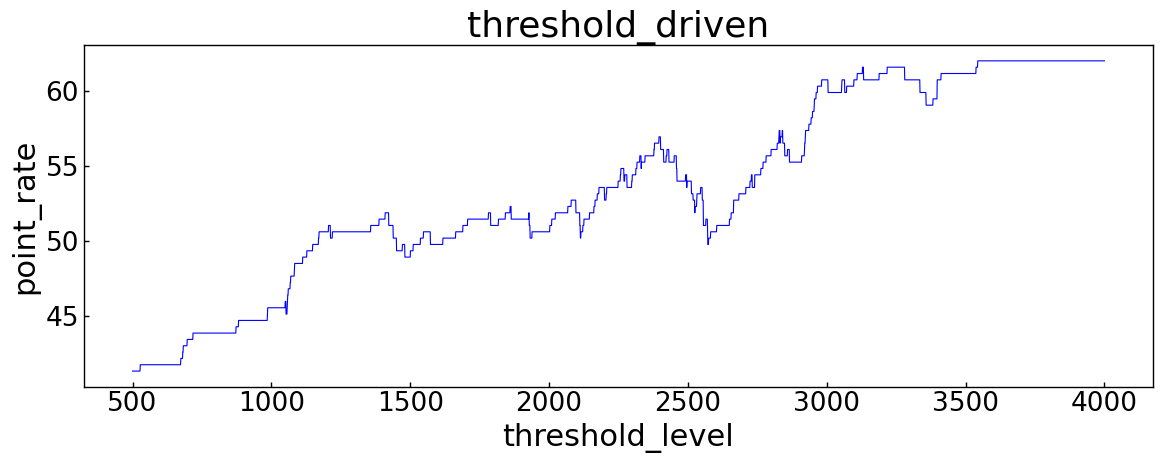

max_score_threshold: 3544


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784452296, 65.01766784

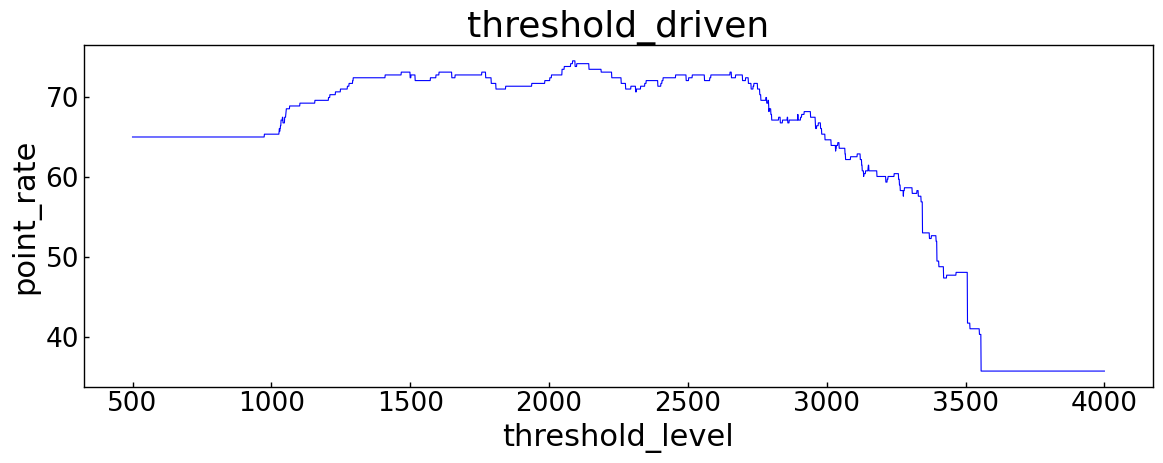

max_score_threshold: 2085
plusPoint:  3


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.29577464788733, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 49.647887323943664, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50

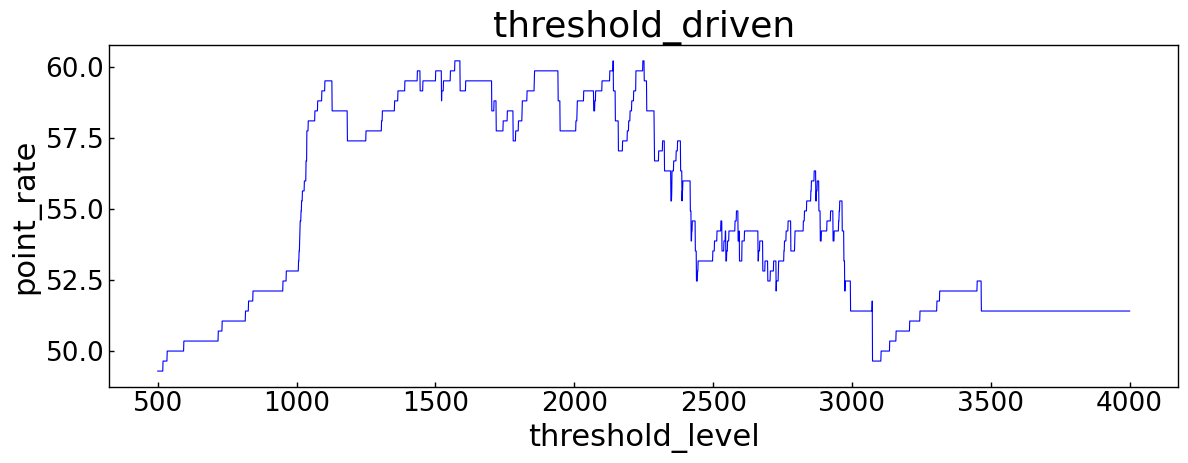

max_score_threshold: 1570


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349726776, 71.85792349

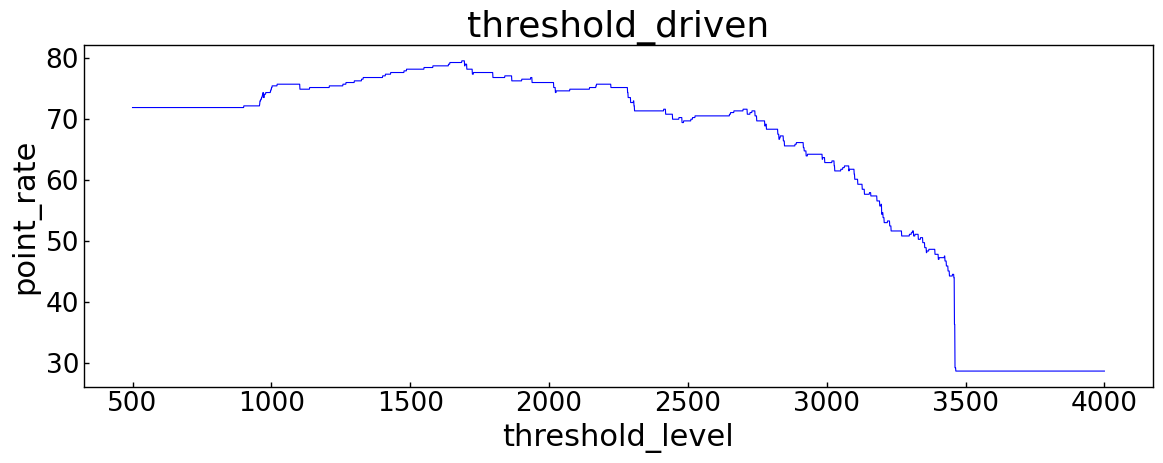

max_score_threshold: 1686


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.35460992907801, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985815603, 50.70921985

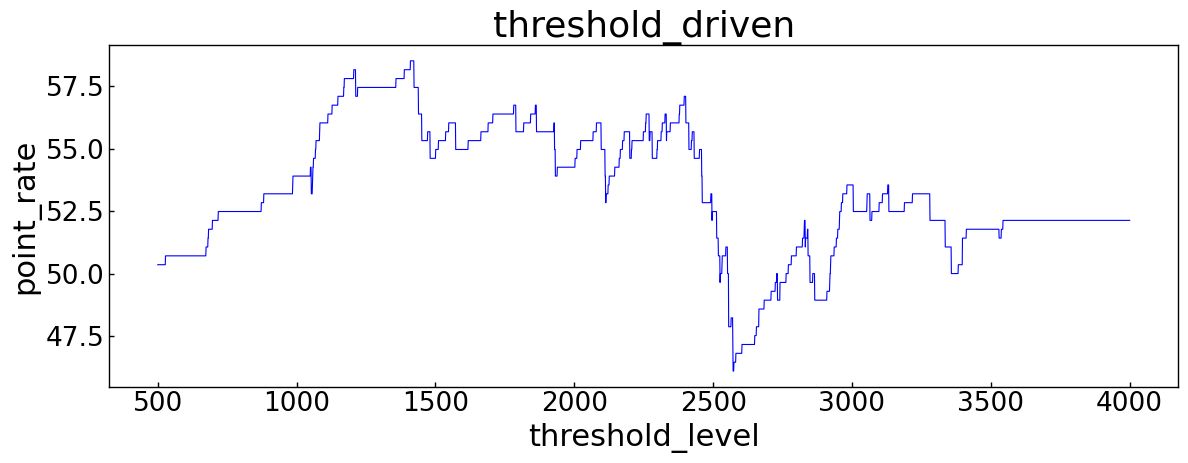

max_score_threshold: 1410


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176470588, 73.52941176

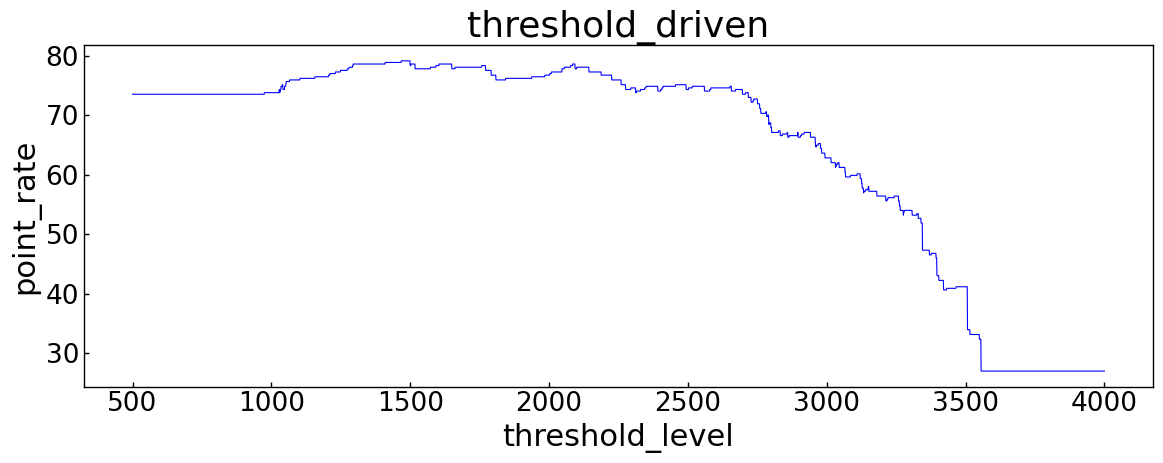

max_score_threshold: 1468
plusPoint:  4


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.36363636363636, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.666666666666664, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.96969696969697, 56.969696969696

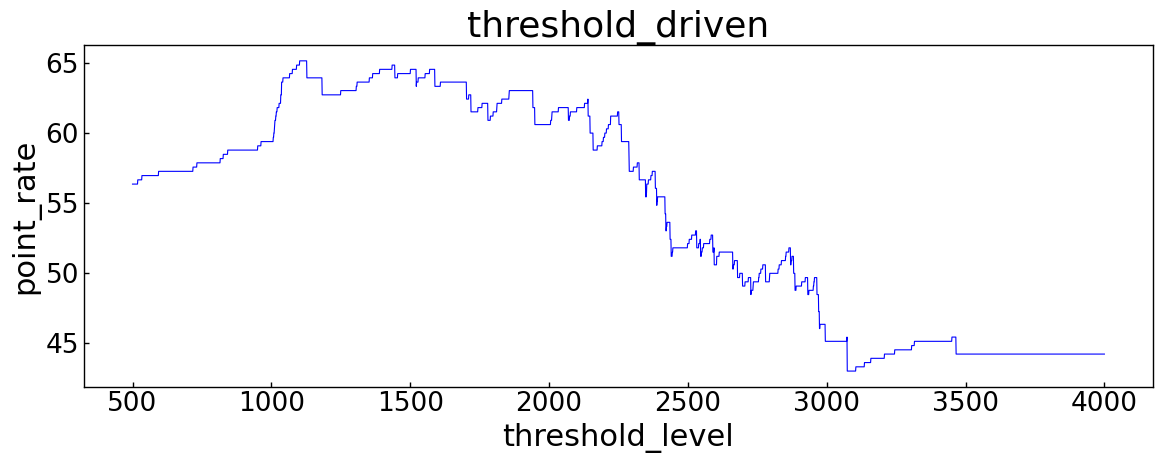

max_score_threshold: 1102


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.2626931567329, 77.262693

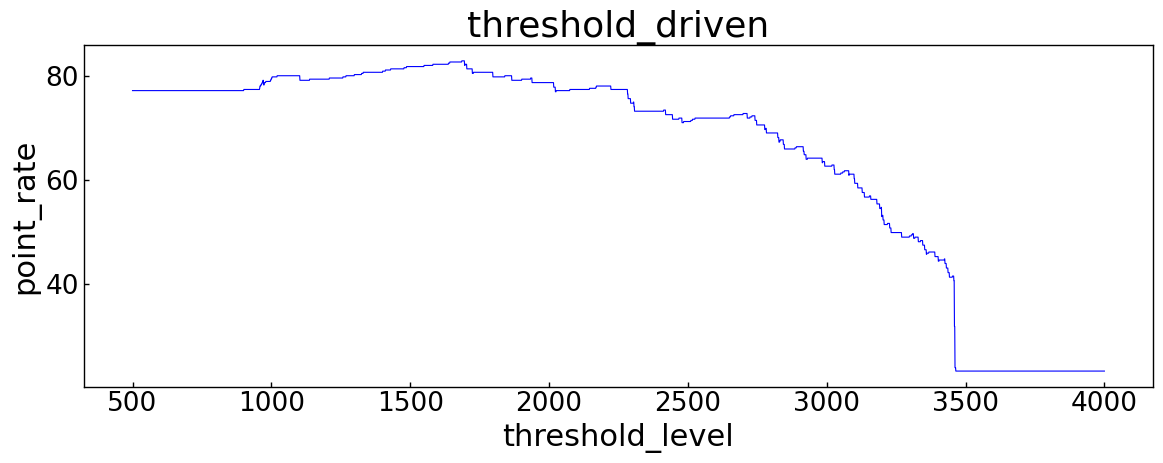

max_score_threshold: 1686


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 56.88073394495413, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434250765, 57.18654434

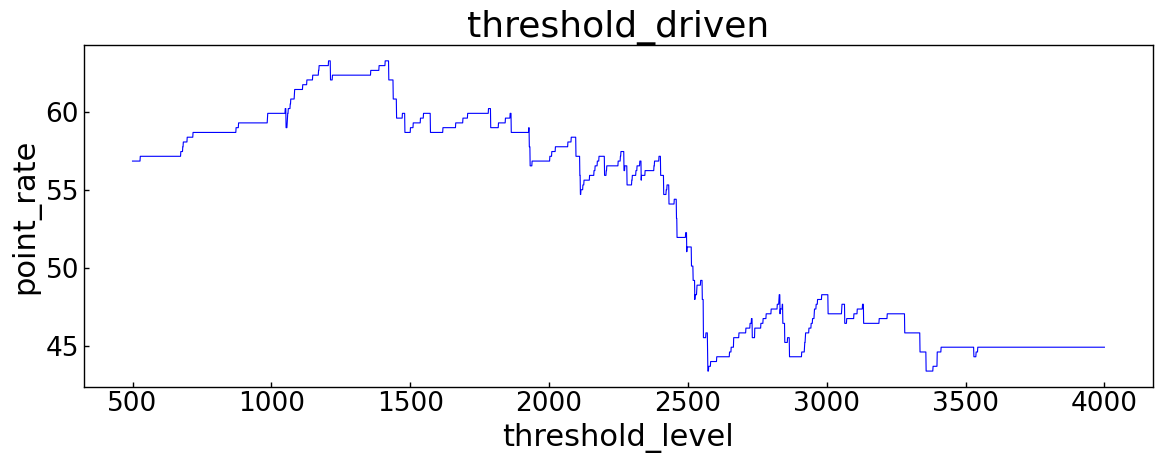

max_score_threshold: 1206


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741935485, 78.70967741

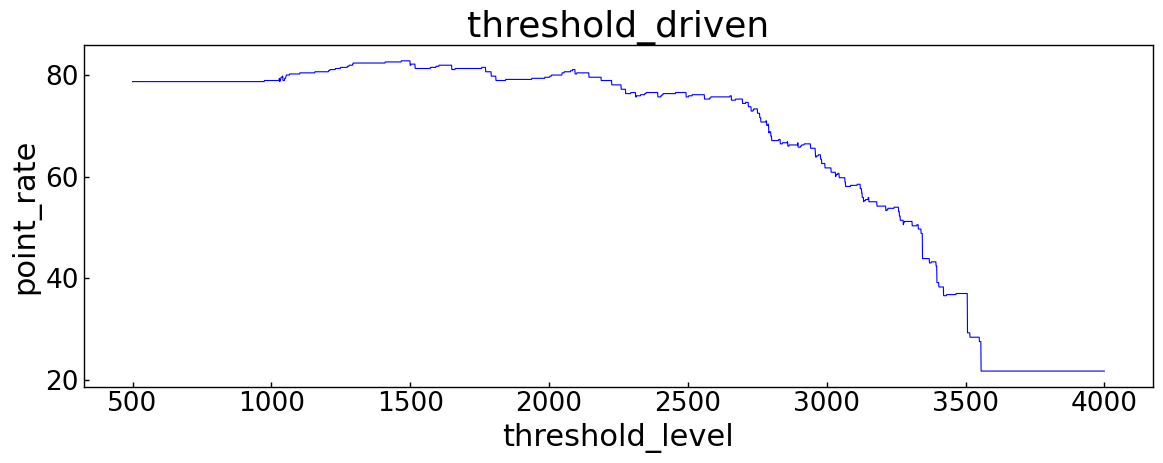

max_score_threshold: 1468
plusPoint:  5


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.702127659574465, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 61.96808510638297, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255319149, 62.23404255

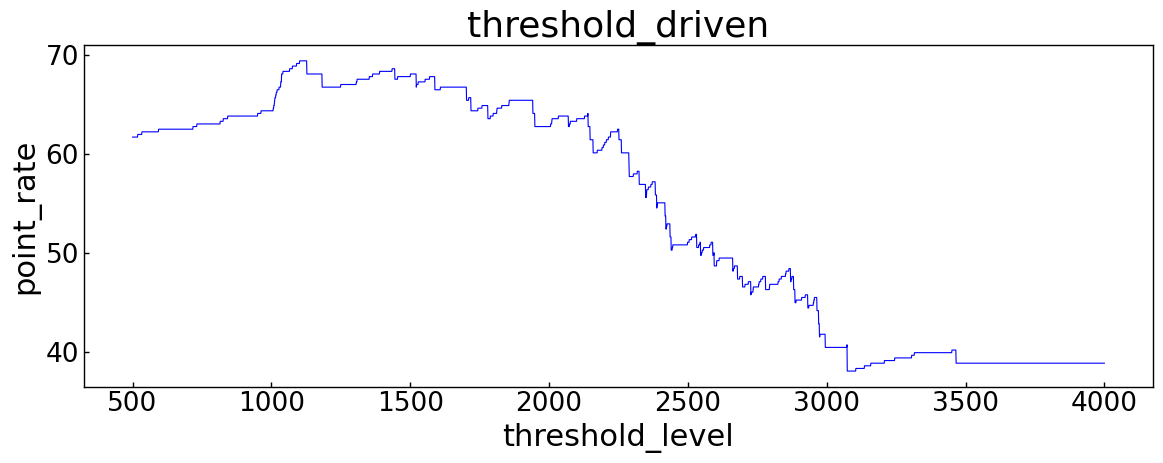

max_score_threshold: 1102


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592592592, 80.92592592

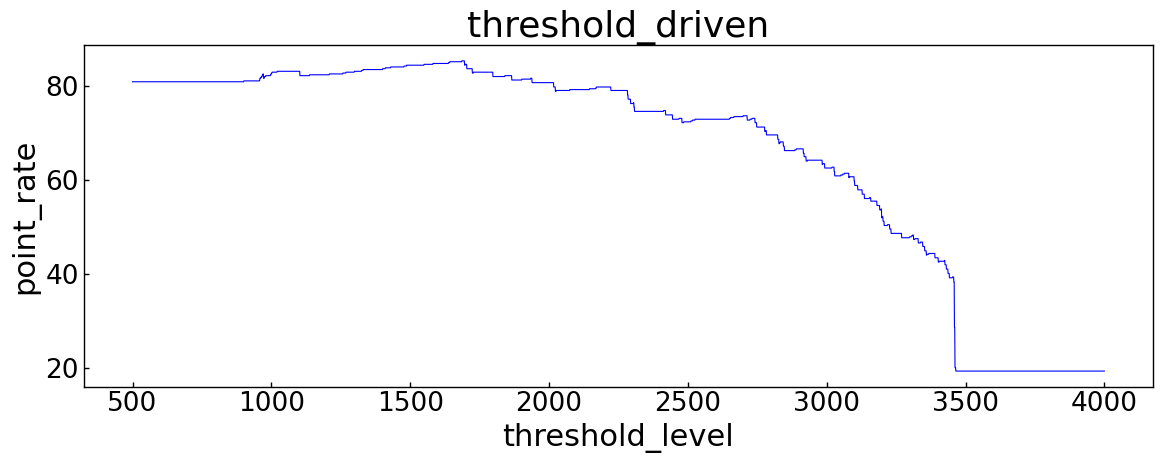

max_score_threshold: 1686


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 61.82795698924731, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.096774193548384, 62.0967

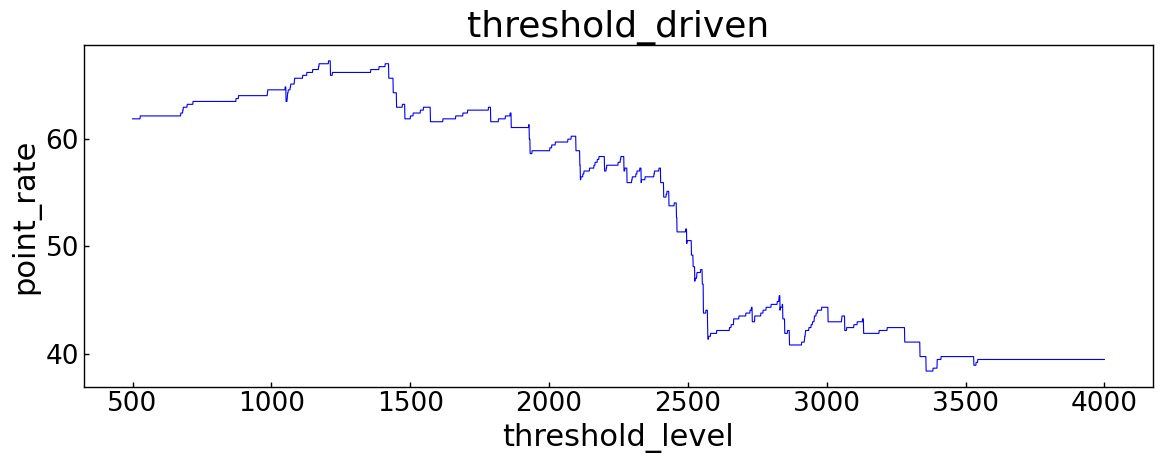

max_score_threshold: 1206


findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: Font family 'Yu Gothic' not found.
findfont: 

[82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460431655, 82.19424460

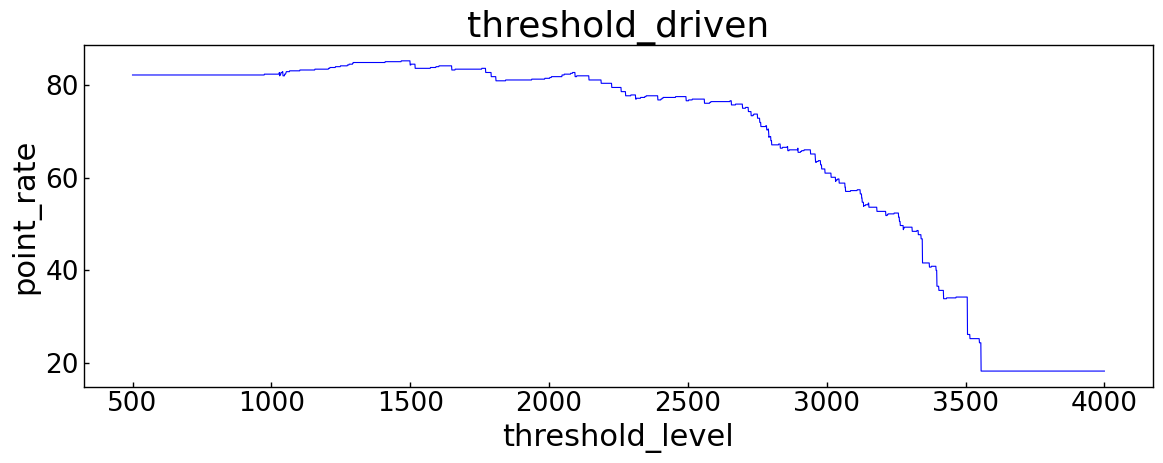

max_score_threshold: 1468


In [34]:
# AccelSensor
start_timing = 642
threshold_level = 2000

# print(len(accel_right_hand), accel_right_hand)
num = 0

file_list = ['data/righthand02.csv', 'data/rightfoot02.csv', 'data/lefthand02.csv', 'data/leftfoot02.csv']

threshold_list = list(range(500, 4001))
max_average_list = []
for plusPoint in range(1, 6):
    print('plusPoint: ', plusPoint)
    max_average = 0
    for i in range(4):
        max_score = 0
        accuracy_list = [0 for _ in range(len(threshold_list))]
        for index, th in enumerate(threshold_list):
            accel_data = accel_timing_move(file_list[i], start_timing, th, "large")
            accuracy_graph, accuracy_num = CompareSimilarlyListWithHandmade(accel_data, partsList[i])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(accel_data, partsList[i], plusPoint)
            accuracy_list[index] = tmp_accuracy
            # print('accuracy:', tmp_accuracy, ' plusPoint:', plusPoint)
        print(accuracy_list[:100])
        XY_to_figure('threshold_driven', 'threshold_level', threshold_list, 'point_rate', accuracy_list)
        max_num = max(accuracy_list)
        max_average += max_num
        max_index = accuracy_list.index(max_num)
        print('max_score_threshold:', threshold_list[max_index])
    max_average_list.append(max_average/4)
    # print(accuracy_graph)

    # print('部位:', partsNameList[i], '  精度:', accuracy_num, '  threshold: ', th)
        



In [ ]:
max_threshold_list = [0, 0, 0, 0]
for i in range(4):
    accel_data = accel_timing_move(file_list[i], start_timing, max_threshold_list[i], "large")
    accuracy_graph, accuracy_num = CompareSimilarlyListWithHandmade(accel_data, partsList[i])
    single_to_figure(accuracy_graph)
    print('accuracy', accuracy_num)

plusPoint:  1


findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.


[36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 36.97916666666667, 37.109375, 37.109375, 37.109375, 37.109375, 37.109375, 37.109375, 37.109375, 37.109375, 37.109375, 37.23958333333333, 37.23958333333333, 37.23958333333333, 37.23958333333333, 37.23958333333333, 37.23958333333333, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.36979166666667, 37.3697

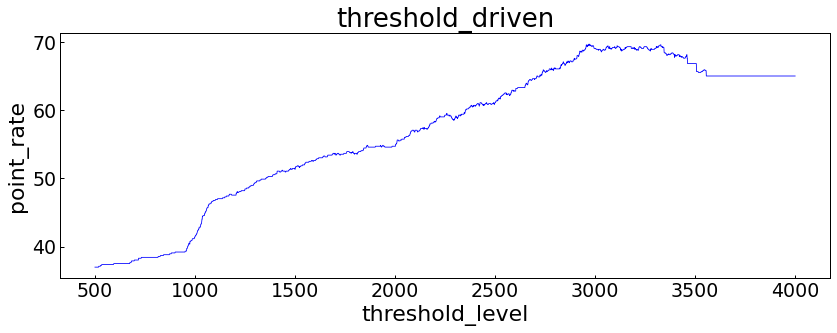

plusPoint:  2
[52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.23652860257512, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.34157061938184, 52.44705585144936, 52.44705585144936, 52.44705585144936, 52.44705585144936, 52.44705585144936, 52.44705585144936, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084, 52.552097868256084,

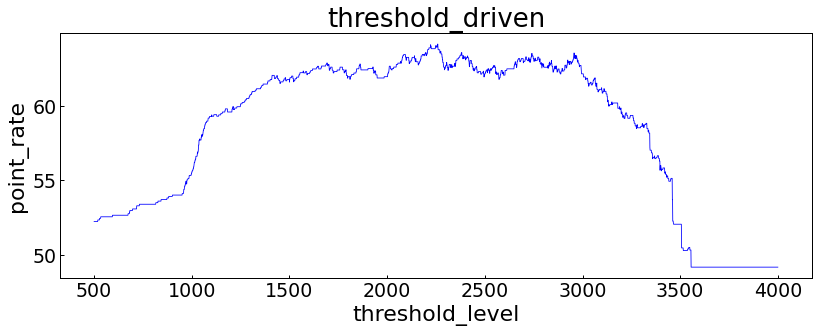

plusPoint:  3
[61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.259429959734746, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.34745812874883, 61.436110611018336, 61.436110611018336, 61.436110611018336, 61.436110611018336, 61.436110611018336, 61.436110611018336, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.52413878003242, 61.5241387

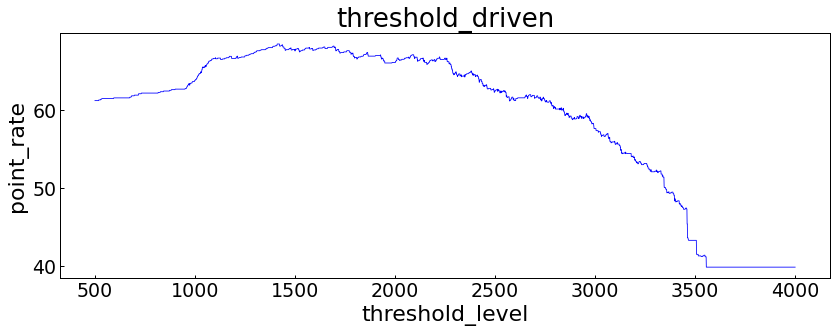

plusPoint:  4
[67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.30418522116956, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.37994279692714, 67.45639539631551, 67.45639539631551, 67.45639539631551, 67.45639539631551, 67.45639539631551, 67.45639539631551, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.53215297207309, 67.5321529720730

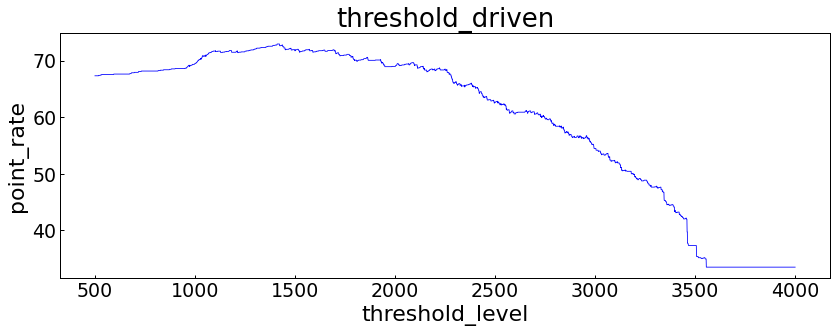

plusPoint:  5
[71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.66256379476607, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.7290531564682, 71.79625745754346, 71.79625745754346, 71.79625745754346, 71.79625745754346, 71.79625745754346, 71.79625745754346, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.86274681924559, 71.862

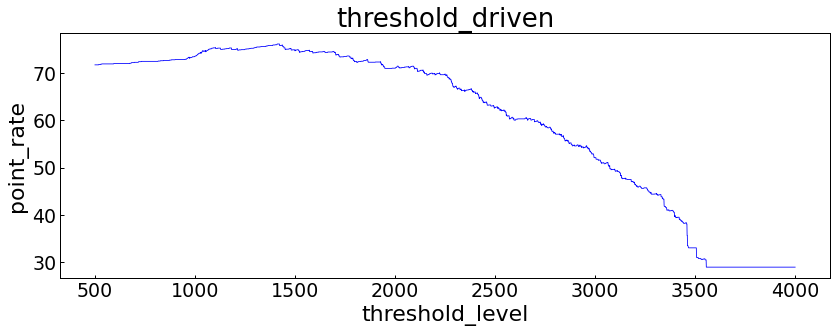

In [8]:
start_timing = 642
threshold_level = 2000

# print(len(accel_right_hand), accel_right_hand)
num = 0

file_list = ['data/righthand02.csv', 'data/rightfoot02.csv', 'data/lefthand02.csv', 'data/leftfoot02.csv']

threshold_list = list(range(500, 4001))
max_average_list = []
for plusPoint in range(1, 6):
    print('plusPoint: ', plusPoint)
    accuracy_list = [0 for _ in range(len(threshold_list))]
    for index, th in enumerate(threshold_list):
        max_average = 0
        for i in range(4):
            accel_data = accel_timing_move(file_list[i], start_timing, th, "large")
            accuracy_graph, accuracy_num = CompareSimilarlyListWithHandmade(accel_data, partsList[i])
            tmp_accuracy = CalAccuracyPriorOverlapTiming(accel_data, partsList[i], plusPoint)
            max_average += tmp_accuracy
        accuracy_list[index] = max_average / 4
            # print('accuracy:', tmp_accuracy, ' plusPoint:', plusPoint)
    print(accuracy_list[:100])
    XY_to_figure('threshold_driven', 'threshold_level', threshold_list, 'point_rate', accuracy_list)